In [ ]:

from google.colab import drive
drive.mount('/content/drive', force_remount=True)


In [ ]:
from numpy.core.arrayprint import format_float_positional
from pycocotools.coco import COCO
from pycocotools import mask as cocomask

from PIL import Image
import os
import numpy as np
import random
import cv2
from google.colab.patches import cv2_imshow
import torch
import torchvision
import torch.nn as nn
from torchvision import transforms
from torchsummary import summary

from torch.utils.data import Dataset
import torchvision.transforms as T


from PIL import Image
from skimage import io

import json
import tqdm

import datetime

import skimage

import matplotlib.cm as cm

import pickle
from scipy.spatial import KDTree

import matplotlib.pyplot as plt


# Deziper les file .TAR

In [ ]:
import tqdm
import subprocess
import multiprocessing

In [ ]:
tar_file_path = "/content/drive/MyDrive/M2_VMI/systeme_de-vision/dataset/8e089a94-555c-4d7b-8f2f-4d733aebb058_train.tar"
extraction_directory = "/content/drive/MyDrive/M2_VMI/systeme_de-vision/dataset"

In [ ]:
def get_number_of_files(tar_file_path):
    command = ["tar", "-tf", tar_file_path]
    output = subprocess.check_output(command)
    return len(output.decode("utf-8").split("\n"))

def extract_file(tar_file_path, extraction_directory):
    subprocess.run(["tar", "-xzvf", tar_file_path, "-C", extraction_directory], check=True)

def extract_tar(tar_file_path, extraction_directory, num_workers=multiprocessing.cpu_count()):
    with tqdm.tqdm(total=get_number_of_files(tar_file_path)) as pbar:
        with multiprocessing.Pool(num_workers) as pool:
            pool.map(extract_file(tar_file_path, extraction_directory), [(tar_file_path, extraction_directory)] * get_number_of_files(tar_file_path))
            pbar.update(get_number_of_files(tar_file_path))
    return pbar


CalledProcessError: Command '['tar', '-tf', '/content/drive/MyDrive/M2_VMI/systeme_de-vision/dataset/8e089a94-555c-4d7b-8f2f-4d733aebb058_train.tar']' returned non-zero exit status 2.

In [ ]:
extract_tar("/content/drive/MyDrive/M2_VMI/systeme_de-vision/dataset/8e089a94-555c-4d7b-8f2f-4d733aebb058_train.tar", "/content/drive/MyDrive/M2_VMI/systeme_de-vision/dataset")


In [ ]:
import tqdm
import subprocess
import multiprocessing


def get_number_of_files(tar_file_path):
    command = ["tar", "-tf", tar_file_path]
    output = subprocess.check_output(command)
    return len(output.decode("utf-8").split("\n")) - 1  # Soustraire 1 pour la ligne vide à la fin

def extract_tar(tar_file_path, extraction_directory):
    # Compter le nombre de fichiers dans l'archive
    file_count = get_number_of_files(tar_file_path)

    # Créer un processus pour extraire l'archive
    with subprocess.Popen(["tar", "-xzvf", tar_file_path, "-C", extraction_directory],
                          stdout=subprocess.PIPE, bufsize=1, text=True) as proc, \
         tqdm.tqdm(total=file_count) as pbar:
        for line in proc.stdout:
            pbar.update(1)

# Chemin de l'archive et du répertoire de destination
tar_file_path = "/content/drive/MyDrive/M2_VMI/systeme_de_vision/dataset/8e089a94-555c-4d7b-8f2f-4d733aebb058_train.tar"
extraction_directory = "/content/drive/MyDrive/M2_VMI/systeme_de_vision/dataset/train/images_1"

# Lancer l'extraction
extract_tar(tar_file_path, extraction_directory)

# Datas path

In [ ]:
os.chdir("/content/drive/MyDrive/M2_VMI/systeme_de_vision")


In [ ]:
#data_directory = "data/"
#annotation_file_template = "{}/{}/annotation{}.json"
#000000280740.jpg

TRAIN_IMAGES_DIRECTORY = "/content/drive/MyDrive/M2_VMI/systeme_de_vision/dataset/train/data_set"
TRAIN_ANNOTATIONS_PATH = "/content/drive/MyDrive/M2_VMI/systeme_de_vision/dataset/train/annotation-small.json"
TRAIN_ANNOTATIONS_SMALL_PATH = "/content/drive/MyDrive/M2_VMI/systeme_de_vision/dataset/train/annotation-small.json"

ECHANTILLON_IMAGE_DIRECTORY = "/content/drive/MyDrive/M2_VMI/systeme_de_vision/dataset/echantillon/images"

RESULT = "/content/drive/MyDrive/M2_VMI/systeme_de_vision/results"

TRAIN_NOM_IMAGES = "/content/drive/MyDrive/M2_VMI/systeme_de_vision/dataset/train/noms_images_train.txt"
TRAIN_ID_IMAGES = "/content/drive/MyDrive/M2_VMI/systeme_de_vision/dataset/train/id_images_train.txt"

TRAIN_SEGMENTATION_DIRECTORY = "/content/drive/MyDrive/M2_VMI/systeme_de_vision/dataset/train/segmentation"
TRAIN_TSD_DIRECTORY = "/content/drive/MyDrive/M2_VMI/systeme_de_vision/dataset/train/tsd"
TRAIN_DENSITY_DIRECTORY = "/content/drive/MyDrive/M2_VMI/systeme_de_vision/dataset/train/density"
TRAIN_DENSITY_DIRECTORY_1 = "/content/drive/MyDrive/M2_VMI/density_coco"

TRAIN_CONTOUR_OBJET_JSON = "/content/drive/MyDrive/M2_VMI/systeme_de_vision/dataset/train/contours_objet.json"
TRAIN_VERTEX_COORDONNEES_JSON = "/content/drive/MyDrive/M2_VMI/systeme_de_vision/dataset/train/vertex_coordonnees.json"
TRAIN_VERTEX_COORDONNEES_JSON_1 = "/content/drive/MyDrive/M2_VMI/systeme_de_vision/dataset/train/vertex_coordonnees_coco.json"

#VAL_IMAGES_DIRECTORY = "data/val/images"
#VAL_ANNOTATIONS_PATH = "data/val/annotation.json"
#VAL_ANNOTATIONS_SMALL_PATH = "data/val/annotation-small.json"

SAVE_MODELE_IN = "/content/drive/MyDrive/M2_VMI/systeme_de_vision/results"


In [ ]:
def images(repertoire):
# Initialisez une liste pour stocker les noms des fichiers JPEG
  fichiers_jpeg = []
  l= []
  # Utilisez os.listdir() pour obtenir la liste de tous les fichiers du répertoire
  fichiers_du_repertoire = os.listdir(repertoire)

  # Parcourez les fichiers et ajoutez les fichiers JPEG à la liste
  for fichier in fichiers_du_repertoire:
      if fichier.endswith('.jpg') or fichier.endswith('.jpeg') or fichier.endswith('.npy'):
          fichiers_jpeg.append(fichier)


  return fichiers_jpeg

#nom_images = images(data_folder + '/images')

# Images traités

In [ ]:
def chargement_txt_file(nom_fi):
  elements = []

  # Ouvrir le fichier en mode lecture
  with open(nom_fi, 'r') as fichier:
      # Lire toutes les lignes du fichier et les stocker dans une liste
      elements = fichier.readlines()

  # Retirer les caractères de saut de ligne à la fin de chaque élément
  elements = [element.strip() for element in elements]

  # Maintenant, 'elements' contient les éléments du fichier
  print(elements)
  return elements

In [ ]:
nom_images = chargement_txt_file(nom_fi = TRAIN_NOM_IMAGES)


['000000211570.jpg', '000000213100.jpg', '000000151221.jpg', '000000127630.jpg', '000000131865.jpg', '000000014602.jpg', '000000177867.jpg', '000000148678.jpg', '000000129579.jpg', '000000041441.jpg', '000000082522.jpg', '000000068941.jpg', '000000151878.jpg', '000000048111.jpg', '000000216331.jpg', '000000039138.jpg', '000000141261.jpg', '000000083774.jpg', '000000143013.jpg', '000000184224.jpg', '000000055432.jpg', '000000042553.jpg', '000000224578.jpg', '000000072994.jpg', '000000214583.jpg', '000000058700.jpg', '000000167063.jpg', '000000163950.jpg', '000000005370.jpg', '000000148141.jpg', '000000183093.jpg', '000000124965.jpg', '000000008296.jpg', '000000121238.jpg', '000000017313.jpg', '000000139460.jpg', '000000017452.jpg', '000000176349.jpg', '000000249958.jpg', '000000182957.jpg', '000000135499.jpg', '000000177599.jpg', '000000201901.jpg', '000000020409.jpg', '000000256902.jpg', '000000033628.jpg', '000000169342.jpg', '000000111256.jpg', '000000056343.jpg', '000000030024.jpg',

# DATA CrowdAI




In [ ]:
# image de CrowdAI
image_CrowdAI = images(TRAIN_IMAGES_DIRECTORY)

OSError: ignored

# Fonctions: obtention de la segmentation , extraction des arretes, des neouds des batiments , calculs de la TSD et de la gaussian maps (à partir de la verité terrain)

In [ ]:
def COCO_file_reading(path_coco_file,a,b,liste_images_CrowdAI): # info sur les objets segmentés , listes des noms des images , liste des idex des images
  coco = COCO(TRAIN_ANNOTATIONS_SMALL_PATH)
  category_ids = coco.loadCats(coco.getCatIds()) # categorie objets segmentés
  #image_ids = coco.getImgIds(catIds=coco.getCatIds()) # liste des id

  images = coco.loadImgs(coco.getImgIds())
  print(len([image['file_name'] for image in images if image['file_name'] in liste_images_CrowdAI]))
  noms_images = [image['file_name'] for image in images if image['file_name'] in liste_images_CrowdAI][a:b] #liste des mon des images
  id_images = [image['id'] for image in images if image['file_name'] in liste_images_CrowdAI][a:b] #liste des mon des images

  return coco, category_ids , noms_images , id_images



In [ ]:
def annotation(coco , liste_nom_image , list_id_image): # renvoie pour chaque image def par son nom: ( son id , la segmentation de ts les batiment presente dans le fichier coco
  dico = {}
  #len(list_id_image)
  for i in range(len(liste_nom_image)) :

    annotation_ids = coco.getAnnIds(imgIds= list_id_image[i])
    annotations = coco.loadAnns(annotation_ids)
    l = []
    for e in annotations:
      l.append(e["segmentation"])
    dico[liste_nom_image[i]] = ( list_id_image[i] ,l)
  print(liste_nom_image[i])
  print(dico[liste_nom_image[i]])
  return dico


In [ ]:
# height = 300 ,width  = 300
def building_segmentation(dico_segmentation ,height,width, nom_repertoir_to_save_result ): # renvoie pour chaque image def par son nom un dictionnaire des masques des batiments
  #dico_masque = {}

  for k,v in dico_segmentation.items():
    matrice_segmentation = np.zeros((height,width ))

    for _idx , annotation in enumerate(v[1]):
      rle = cocomask.frPyObjects(annotation, height,width )
      m = cocomask.decode(rle)
      m = np.array(m)
      m= m.reshape(300, 300)

      matrice_segmentation = matrice_segmentation + m

    resized_matrice_segmentation = cv2.resize(matrice_segmentation  , dsize=(224,224), interpolation=cv2.INTER_NEAREST) #  INTER_LINEAR
    #dico_masque[k] = resized_matrice_segmentation
    resized_matrice_segmentation = np.where(resized_matrice_segmentation == 0, 0, 255)
    image = Image.fromarray(resized_matrice_segmentation.astype(np.uint8))
    image.save(nom_repertoir_to_save_result + '/'+ k.split(".")[0] + '.png')
  print(k)
  #return dico_masque


In [ ]:
def nearest_point_kd_tree(liste_points_contours, p):
    # Créer un K-D Tree à partir de la liste de points
    kd_tree = KDTree(liste_points_contours)

    # Trouver le point le plus proche de p dans le K-D Tree
    distance, index = kd_tree.query(p)

    # Retourner le point le plus proche et la distance
    return distance


In [ ]:
def TSD_function_optimisé(segmentation , t , contours_polygone ):

  h,w = np.shape(segmentation)
  masque_contours = np.zeros((h,w), dtype=np.uint8)
  TSD_matrice = np.zeros((h,w), dtype=np.float64)
  contours_polygone_np = np.array(contours_polygone)
  masque_contours[contours_polygone_np[:, 0], contours_polygone_np[:, 1]] = 1

  # Construction du KD-Tree avec contours_polygone
  kd_tree = KDTree(contours_polygone_np)

  # Exemple de points (à remplacer par votre grille de points)
  x, y = np.meshgrid(np.arange(h), np.arange(w))
  points = np.vstack((y.ravel(), x.ravel())).T

  # Calculer les distances pour chaque point dans points
  distances, _ = kd_tree.query(points)

  # Remodeler les distances pour correspondre à la forme de la segmentation
  distances = distances.reshape((h,w))

  # Ajuster TSD_matrice pour les points intérieurs (segmentation == 1)
  TSD_matrice[(segmentation == 1) & (masque_contours == 0)] = 1 + np.minimum(distances[(segmentation == 1) & (masque_contours == 0)], t) / t

  # Ajuster TSD_matrice pour les points extérieurs (segmentation == 0)
  TSD_matrice[(segmentation == 0) & (masque_contours == 0)] = -1 - np.minimum(distances[(segmentation == 0) & (masque_contours == 0)], t) / t
  return TSD_matrice


# Segmentation sementique des batiments + extraction des vertex(données issus de la verité terrain):

In [ ]:
coco_ , categorie , nom_image, id_image  =COCO_file_reading(path_coco_file = TRAIN_ANNOTATIONS_SMALL_PATH , a = 0 , b = 1000 , liste_images_CrowdAI = image_CrowdAI)

NameError: name 'COCO_file_reading' is not defined

In [ ]:
with open(TRAIN_NOM_IMAGES, 'w') as fichier1:
    for ni in nom_image:
        # Écrire chaque élément suivi d'un saut de ligne
        fichier1.write( ni + '\n')

In [ ]:
annotation_dico = annotation(coco = coco_ ,
    liste_nom_image =  nom_image ,
           list_id_image = id_image ) # annotation_dico["000000135701.jpg"] : (135701, [163.0, 255.0, 153.0, 232.0, 179.0, 214.0, 189.0, 236.0, 163.0, 255.0])


In [ ]:
segmentation_building = building_segmentation(dico_segmentation = annotation_dico ,
                                              height = 300,
                                              width = 300,
                                              nom_repertoir_to_save_result = TRAIN_SEGMENTATION_DIRECTORY)



In [ ]:
def find_contour_objet(segmentation):

  edges = cv2.Canny(segmentation, threshold1=50, threshold2=150)
  contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  #print(contours[0].tolist())
  #print((contours[0].reshape(-1, 2).tolist()))
  l = []
  for c in contours:
    c = c.reshape(-1, 2)
    c[:, [0, 1]] = c[:, [1, 0]]
    c = c.tolist()
    l.extend(c)
  return l


In [ ]:

liste_contour_polygone = []
nom_image  = chargement_txt_file(nom_fi = TRAIN_NOM_IMAGES)

with tqdm.tqdm(total = len(nom_image), desc="find building contour") as pbar_2:

  for e in nom_image :

    # Charger l'image
    segmentation_image = Image.open( TRAIN_SEGMENTATION_DIRECTORY + '/' + e.split(".")[0] + '.png')
    # Convertir l'image en matrice
    segmentation_image = np.asarray(segmentation_image)


    find_contour_polygone =  find_contour_objet(segmentation_image)

    liste_contour_polygone.append(find_contour_polygone)

    pbar_2.update()


In [ ]:
def find_vertex(nom_im,epsilon_):
  mask_image = cv2.imread(nom_im, cv2.IMREAD_GRAYSCALE)

  edges = cv2.Canny(mask_image, threshold1=50, threshold2=150)

  contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  approx_contours = [cv2.approxPolyDP(contour, epsilon=epsilon_, closed=True) for contour in contours]
  list_of_lists_approx_contours = [matrix.tolist() for matrix in approx_contours]


  return list_of_lists_approx_contours

In [ ]:
liste_contour_polygone = []
liste_vertex = []

with tqdm.tqdm(total = len(nom_images), desc="computing vertex map") as pbar_2:

  for e in nom_images :
    vertex_image = find_vertex(nom_im = TRAIN_SEGMENTATION_DIRECTORY + '/' + e.split(".")[0] + '.png' , epsilon_= 3)
    liste_vertex.append(vertex_image)
    pbar_2.update()



In [ ]:
def save_in_json(nom_fi_json , list_point):
  with open(nom_fi_json, "w") as f:

    # Convertir la liste de liste de tuple en objet JSON
    objet_json = {"XY":  list_point }

    # Écrire l'objet JSON dans le fichier
    json.dump(objet_json, f)

In [ ]:
'''
save_in_json(nom_fi_json  = TRAIN_CONTOUR_OBJET_JSON,
             list_point = liste_contour_polygone)
'''
"""
save_in_json(nom_fi_json  = TRAIN_VERTEX_COORDONNEES_JSON,
             list_point = liste_vertex)
"""

vertex selon l'annotation coco

In [ ]:
def annotation(liste_nom_image): # renvoie pour chaque image def par son nom: ( son id , la segmentation de ts les batiment presente dans le fichier coco
  dico = {}
  coco = COCO(TRAIN_ANNOTATIONS_SMALL_PATH)

  # Obtenir les informations de toutes les images dans le fichier d'annotations
  all_images_info = coco.loadImgs(coco.getImgIds())

  # Trouver les ID correspondant aux noms de fichiers
  image_ids = [img['id'] for img in all_images_info if img['file_name'] in liste_nom_image]

  list_vertex = []

  for i in range(len(image_ids)) :
    annotation_ids = coco.getAnnIds(imgIds= image_ids[i])
    annotations = coco.loadAnns(annotation_ids)
    l = []
    for e in annotations:
      transformed_list = [[e["segmentation"][0][h], e["segmentation"][0][h + 1]] for h in range(0, len(e["segmentation"][0]), 2)]

      l.append(transformed_list)
    list_vertex.append(l)

  return list_vertex

In [ ]:
vertex = annotation(nom_images)

In [ ]:
print((vertex[801]))


In [ ]:
save_in_json(nom_fi_json  = TRAIN_VERTEX_COORDONNEES_JSON_1,
             list_point = vertex)

# Charger les noms des images traités et les coordonnées des vertex et contours

In [ ]:
def chargement_txt_file(nom_fi):
  elements = []

  # Ouvrir le fichier en mode lecture
  with open(nom_fi, 'r') as fichier:
      # Lire toutes les lignes du fichier et les stocker dans une liste
      elements = fichier.readlines()

  # Retirer les caractères de saut de ligne à la fin de chaque élément
  elements = [element.strip() for element in elements]

  # Maintenant, 'elements' contient les éléments du fichier
  print(elements)
  return elements

In [ ]:
def open_json_file(nom_fi_json):
  with open(nom_fi_json, "r") as f:

    # Lire les données du fichier
    chaine_de_caracteres = f.read()

    # Convertir les données en objet Python
    objet_json_contour = json.loads(chaine_de_caracteres)

    # Afficher les données
    print(objet_json_contour)
    return objet_json_contour

In [ ]:
nom_images = chargement_txt_file(nom_fi = TRAIN_NOM_IMAGES)
print(nom_images.index("000000269959.jpg"))

['000000211570.jpg', '000000213100.jpg', '000000151221.jpg', '000000127630.jpg', '000000131865.jpg', '000000014602.jpg', '000000177867.jpg', '000000148678.jpg', '000000129579.jpg', '000000041441.jpg', '000000082522.jpg', '000000068941.jpg', '000000151878.jpg', '000000048111.jpg', '000000216331.jpg', '000000039138.jpg', '000000141261.jpg', '000000083774.jpg', '000000143013.jpg', '000000184224.jpg', '000000055432.jpg', '000000042553.jpg', '000000224578.jpg', '000000072994.jpg', '000000214583.jpg', '000000058700.jpg', '000000167063.jpg', '000000163950.jpg', '000000005370.jpg', '000000148141.jpg', '000000183093.jpg', '000000124965.jpg', '000000008296.jpg', '000000121238.jpg', '000000017313.jpg', '000000139460.jpg', '000000017452.jpg', '000000176349.jpg', '000000249958.jpg', '000000182957.jpg', '000000135499.jpg', '000000177599.jpg', '000000201901.jpg', '000000020409.jpg', '000000256902.jpg', '000000033628.jpg', '000000169342.jpg', '000000111256.jpg', '000000056343.jpg', '000000030024.jpg',

In [ ]:
liste_contour_polygone = open_json_file(nom_fi_json = TRAIN_CONTOUR_OBJET_JSON)
liste_vertex = open_json_file(nom_fi_json = TRAIN_VERTEX_COORDONNEES_JSON)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



{'XY': [[[[[70, 192]], [[70, 207]], [[53, 208]], [[51, 223]], [[53, 208]], [[70, 208]], [[70, 192]], [[24, 193]], [[22, 223]], [[24, 193]]], [[[223, 187]], [[211, 189]], [[210, 223]], [[211, 189]]], [[[150, 185]], [[150, 211]], [[161, 212]], [[162, 221]], [[168, 223]], [[162, 221]], [[161, 212]], [[150, 211]], [[150, 185]], [[193, 183]], [[194, 223]], [[193, 183]]], [[[7, 155]], [[7, 177]], [[69, 180]], [[70, 168]], [[56, 162]], [[54, 153]]], [[[5, 107]], [[6, 126]], [[19, 126]], [[21, 130]], [[70, 130]], [[70, 114]], [[62, 113]], [[55, 105]]], [[[199, 93]], [[184, 93]], [[181, 106]], [[158, 108]], [[159, 143]], [[200, 143]]], [[[49, 9]], [[8, 12]], [[8, 72]], [[12, 81]], [[35, 81]], [[37, 73]], [[61, 73]], [[61, 49]], [[42, 48]], [[42, 37]], [[50, 35]]], [[[188, 25]], [[190, 0]], [[223, 0]], [[190, 0]], [[189, 26]], [[209, 26]], [[209, 13]], [[223, 11]], [[211, 11]], [[208, 26]]], [[[118, 1]], [[158, 0]], [[159, 17]], [[141, 17]], [[141, 3]], [[142, 18]], [[159, 18]], [[158, 0]]]], [[

# Computer la TSD à partir de la verité terrain

In [ ]:
# compute la tds pour les images:
valeurs_t = [15,20,30]
for t in valeurs_t:

  with tqdm.tqdm(total = len(nom_images), desc="computing TSD map") as pbar:
    for i in range(len(liste_contour_polygone["XY"])):

      # Charger l'image
      segmentation_image = Image.open( TRAIN_SEGMENTATION_DIRECTORY + '/' +  nom_images[i].split(".")[0] + '.png')
      # Convertir l'image en matrice
      segmentation_image = np.asarray(segmentation_image)
      segmentation_image = np.where(segmentation_image == 0, 0, 1)
      #print(segmentation_image)

      #print(f"Processing image: {k}")
      #matrice_contour , list_contour_polygone =  contour_polygone(segmentation_matrice = segmentation_image)
      #print(list_contour_polygone) v matrice de segmentation
      #print( TRAIN_SEGMENTATION_DIRECTORY + '/' +  nom_images[i].split(".")[0] + '.png')
      #print(liste_contour_polygone["XY"][i])
      if  len(liste_contour_polygone["XY"][i]) != 0:
        TSD_matrice = TSD_function_optimisé(segmentation_image , t , liste_contour_polygone["XY"][i])
        np.save(os.path.join(TRAIN_TSD_DIRECTORY,str(t), nom_images[i].split(".")[0] + '.npy'), TSD_matrice)


      pbar.update()



computing TSD map: 100%|██████████| 1000/1000 [01:40<00:00,  9.94it/s]


In [ ]:
def affichage_tsd(tsd1,tsd3,tsd6,tsd10,tsd15,tsd20,tsd30):

  fig, axs = plt.subplots(4, 2, figsize=(10, 16))


  tsd_1 = axs[0, 0].imshow(tsd1, cmap='RdGy')
  axs[0, 0].set_title('tsd1')
  fig.colorbar(tsd_1, ax=axs[0, 0])


  tsd_3 =  axs[0, 1].imshow(tsd3, cmap='RdGy')
  axs[0, 1].set_title('tsd3')
  fig.colorbar(tsd_3, ax=axs[0, 1])


  tsd_6 = axs[1, 0].imshow(tsd6, cmap='RdGy')
  axs[1, 0].set_title('tsd6')
  fig.colorbar(tsd_6, ax=axs[1, 0])


  tsd_10 = axs[1, 1].imshow(tsd10, cmap='RdGy')
  axs[1, 1].set_title('tsd10')
  fig.colorbar(tsd_10, ax=axs[1, 1])

  tsd_15 =  axs[2, 0].imshow(tsd15, cmap='RdGy')
  axs[2, 0].set_title('tsd15')
  fig.colorbar(tsd_15, ax=axs[2, 0])


  tsd_20 = axs[2, 1].imshow(tsd20, cmap='RdGy')
  axs[2, 1].set_title('tsd20')
  fig.colorbar(tsd_20, ax=axs[2, 1])


  tsd_30 = axs[3, 0].imshow(tsd30, cmap='RdGy')
  axs[3, 0].set_title('tsd30')
  fig.colorbar(tsd_30, ax=axs[3, 0])
  # Ajustement de l'espacement
  plt.tight_layout()

  # Affichage des graphiques
  plt.show()

In [ ]:
tsd_1 = np.load(os.path.join(TRAIN_TSD_DIRECTORY,str(1), '000000233559' + '.npy'))
tsd_3 = np.load(os.path.join(TRAIN_TSD_DIRECTORY,str(3), '000000233559' + '.npy'))
tsd_6 = np.load(os.path.join(TRAIN_TSD_DIRECTORY,str(6),'000000233559' + '.npy'))
tsd_10 = np.load(os.path.join(TRAIN_TSD_DIRECTORY,str(10), '000000233559' + '.npy'))
tsd_15 = np.load(os.path.join(TRAIN_TSD_DIRECTORY,str(15), '000000233559' + '.npy'))
tsd_20 = np.load(os.path.join(TRAIN_TSD_DIRECTORY,str(20),'000000233559' + '.npy'))
tsd_30 = np.load(os.path.join(TRAIN_TSD_DIRECTORY,str(30), '000000233559' + '.npy'))


In [ ]:
affichage_tsd(tsd_1,tsd_3,tsd_6,tsd_10,tsd_15,tsd_20,tsd_30)

# Computer la gaussian density map

In [ ]:
def compute_gaussian(matrix_shape, p0, sigma):
    # Create an array with the coordinates of each pixel
    x = np.arange(matrix_shape[0])#1
    y = np.arange(matrix_shape[1])#0
    xx, yy = np.meshgrid(x, y)

    # Calculate the Gaussian function for each pixel
    g = (1 / (2 * np.pi * sigma ** 2)) * np.exp(-((yy - p0[1]) ** 2 + (xx - p0[0]) ** 2) / (2 * sigma ** 2))

    return g


In [ ]:

def Density_matrice(liste_matrices):

  # Empilez toutes les matrices pour créer un tableau 3D
  stacked_matrices = np.stack(liste_matrices)

  # Calculez le maximum pour chaque pixel sur toutes les matrices
  Density = np.amax(stacked_matrices, axis=0)
  return Density


In [ ]:
liste_sigma = [1,4,8,16,32]
for sig in liste_sigma:
  with tqdm.tqdm(total = len(liste_vertex["XY"]), desc="computing DENSITY map") as pbar:

    for i in range(len(liste_vertex["XY"])) :
      if len(liste_vertex["XY"][i]) != 0:
        list_matrice_gaussienne = []
        for building in liste_vertex["XY"][i]:
            #print("bbbb",bulding)
            for vertexx in building:
              #print((vertexx))
              #print("ccc", (vertexx[0],vertexx[1]))
              matrice_gaussienne = compute_gaussian(matrix_shape = (300,300), p0 = (vertexx[0],vertexx[1]), sigma = sig)
              resized_matrice_gaussienne = cv2.resize(matrice_gaussienne  , dsize=(224,224), interpolation=cv2.INTER_CUBIC) #  INTER_LINEAR
              list_matrice_gaussienne.append(resized_matrice_gaussienne)

        D = Density_matrice(list_matrice_gaussienne)
        max_value = np.max(D)
        coordinates = np.argwhere(D == max_value)
        print(np.shape(coordinates))
        #resized_D = cv2.resize(D  , dsize=(224,224), interpolation=cv2.INTER_NEAREST INTER_CUBIC) #  INTER_LINEAR
        #max_value = np.max(resized_D)
        #coordinates = np.argwhere(resized_D == max_value)
        #print(np.shape(coordinates))
        #print(resized_D.dtype)
        #np.savetxt(os.path.join(TRAIN_DENSITY_DIRECTORY, nom_images[i].split(".")[0] + '.txt'), D, fmt= '%.16e', delimiter=';')
        np.save(os.path.join(TRAIN_DENSITY_DIRECTORY_1,'dd',str(sig), nom_images[i].split(".")[0] + '.npy'), D)
      pbar.update()

[[[282.0, 300.0], [283.0, 250.99999999999997], [300.0, 250.99999999999997], [300.0, 300.0], [282.0, 300.0]], [[156.99999999999997, 4.0], [156.99999999999997, 1.0], [213.99999999999997, 1.0], [213.99999999999997, 25.0], [188.99999999999997, 25.0], [188.99999999999997, 4.0], [156.99999999999997, 4.0]], [[9.00000000000001, 238.00000000000003], [10.000000000000007, 205.00000000000003], [29.000000000000007, 205.00000000000003], [74.0, 206.0], [74.00000000000001, 218.0], [76.00000000000001, 218.0], [82.00000000000001, 218.0], [82.00000000000001, 223.0], [94.00000000000001, 224.0], [93.00000000000001, 242.0], [28.00000000000001, 242.00000000000003], [28.00000000000001, 238.00000000000003], [9.00000000000001, 238.00000000000003]], [[225.00000000000003, 300.0], [225.00000000000003, 298.0], [218.00000000000003, 298.0], [218.00000000000003, 285.0], [201.00000000000003, 285.0], [201.0, 246.0], [260.0, 246.0], [260.0, 300.0], [225.00000000000003, 300.0]], [[7.000000000000003, 170.00000000000003], [6.999999999999999, 141.00000000000003], [28.0, 141.00000000000003], [76.0, 141.0], [76.0, 146.0], [82.0, 146.0], [82.0, 152.0], [95.0, 152.0], [95.0, 175.0], [27.000000000000004, 175.00000000000003], [27.000000000000004, 170.00000000000003], [7.000000000000003, 170.00000000000003]], [[30.000000000000018, 300.0], [30.000000000000014, 259.0], [59.000000000000014, 259.0], [59.000000000000014, 257.0], [94.00000000000001, 257.0], [94.00000000000001, 259.0], [94.00000000000001, 279.0], [69.00000000000001, 279.0], [69.00000000000001, 280.0], [69.00000000000001, 280.0], [69.00000000000001, 300.0], [30.000000000000018, 300.0]], [[244.0, 125.0], [269.0, 124.99999999999997], [269.0, 191.99999999999997], [212.0, 192.0], [212.0, 142.0], [244.0, 142.0], [244.0, 125.0]], [[253.0, 36.0], [252.99999999999997, 1.0], [300.0, 0.9999999999999716], [300.0, 14.999999999999972], [280.0, 14.999999999999972], [280.0, 35.99999999999997], [253.0, 36.0]], [[15.999999999999995, 109.00000000000003], [14.999999999999993, 99.00000000000003], [10.999999999999993, 99.00000000000003], [10.999999999999984, 14.000000000000028], [66.99999999999999, 13.0], [66.99999999999999, 47.0], [56.999999999999986, 47.0], [56.99999999999999, 66.0], [67.99999999999999, 66.0], [82.99999999999999, 65.0], [83.0, 99.0], [68.0, 99.0], [46.99999999999999, 99.0], [47.99999999999999, 109.0], [15.999999999999995, 109.00000000000003]]]

#TRAIN_DENSITY_DIRECTORY_1

computing DENSITY map:   0%|          | 0/1000 [00:00<?, ?it/s]

(1, 2)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/M2_VMI/density_coco/dd/1/000000211570.npy'

In [ ]:
'''
liste_sigma = [1,4,8,16,32]
for sig in liste_sigma:
  with tqdm.tqdm(total = len(liste_vertex["XY"]), desc="computing DENSITY map") as pbar:

    for i in range(len(liste_vertex["XY"])) :
      if len(liste_vertex["XY"][i]) != 0:
        list_matrice_gaussienne = []
        for el in liste_vertex["XY"][i]:
          #print("aaaaa",el)
          for bulding in el:
            #print("bbbb",bulding)
            for vertexx in bulding:
              #print("ccc", (vertexx[0],vertexx[1]))
              matrice_gaussienne = compute_gaussian(matrix_shape = (224,224), p0 = (vertexx[1],vertexx[0]), sigma = sig)
              list_matrice_gaussienne.append(matrice_gaussienne)
        D = Density_matrice(list_matrice_gaussienne)
        #print(D.dtype)
        #np.savetxt(os.path.join(TRAIN_DENSITY_DIRECTORY, nom_images[i].split(".")[0] + '.txt'), D, fmt= '%.16e', delimiter=';')
        np.save(os.path.join(TRAIN_DENSITY_DIRECTORY,str(sig), nom_images[i].split(".")[0] + '.npy'), D)
      pbar.update()


'''

computing DENSITY map: 100%|██████████| 1000/1000 [00:58<00:00, 17.12it/s]


In [ ]:
def affichage_density(density1,density4,density8,density16,density32):

  fig, axs = plt.subplots(3, 2, figsize=(15, 10))


  density_1 = axs[0, 0].imshow(density1, cmap='hot')
  axs[0, 0].set_title('density1')
  fig.colorbar(density_1, ax=axs[0, 0])

  density_4 = axs[0,1].imshow(density4, cmap='hot')
  axs[0, 1].set_title('density4')
  fig.colorbar(density_4, ax=axs[0, 1])


  density_8 =  axs[1,0].imshow(density8, cmap='hot')
  axs[1,0].set_title('density8')
  fig.colorbar(density_8, ax=axs[1,0])


  density_16 = axs[1, 1].imshow(density16, cmap='hot')
  axs[1, 1].set_title('density16')
  fig.colorbar(density_16, ax=axs[1, 1])


  density_32 = axs[2, 0].imshow(density32, cmap='hot')
  axs[2, 0].set_title('density32')
  fig.colorbar(density_32, ax=axs[2, 0])


  # Ajustement de l'espacement
  plt.tight_layout()

  # Affichage des graphiques
  plt.show()

In [ ]:
"""density_1 = np.load(os.path.join(TRAIN_DENSITY_DIRECTORY,str(1), nom_images[1].split(".")[0] + '.npy'))
density_8 = np.load(os.path.join(TRAIN_DENSITY_DIRECTORY,str(8), nom_images[1].split(".")[0] + '.npy'))
density_16 = np.load(os.path.join(TRAIN_DENSITY_DIRECTORY,str(16),nom_images[1].split(".")[0] + '.npy'))
density_32 = np.load(os.path.join(TRAIN_DENSITY_DIRECTORY,str(32), nom_images[1].split(".")[0] + '.npy'))
"""

#"000000233559"
density_1 = np.load(os.path.join(TRAIN_DENSITY_DIRECTORY_1,str(1), "000000233559" + '.npy'))
density_4 = np.load(os.path.join(TRAIN_DENSITY_DIRECTORY_1,str(4), "000000233559" + '.npy'))
density_8 = np.load(os.path.join(TRAIN_DENSITY_DIRECTORY_1,str(8), '000000233559' + '.npy'))
density_16 = np.load(os.path.join(TRAIN_DENSITY_DIRECTORY_1,str(16),'000000233559' + '.npy'))
density_32 = np.load(os.path.join(TRAIN_DENSITY_DIRECTORY_1,str(32), '000000233559' + '.npy'))

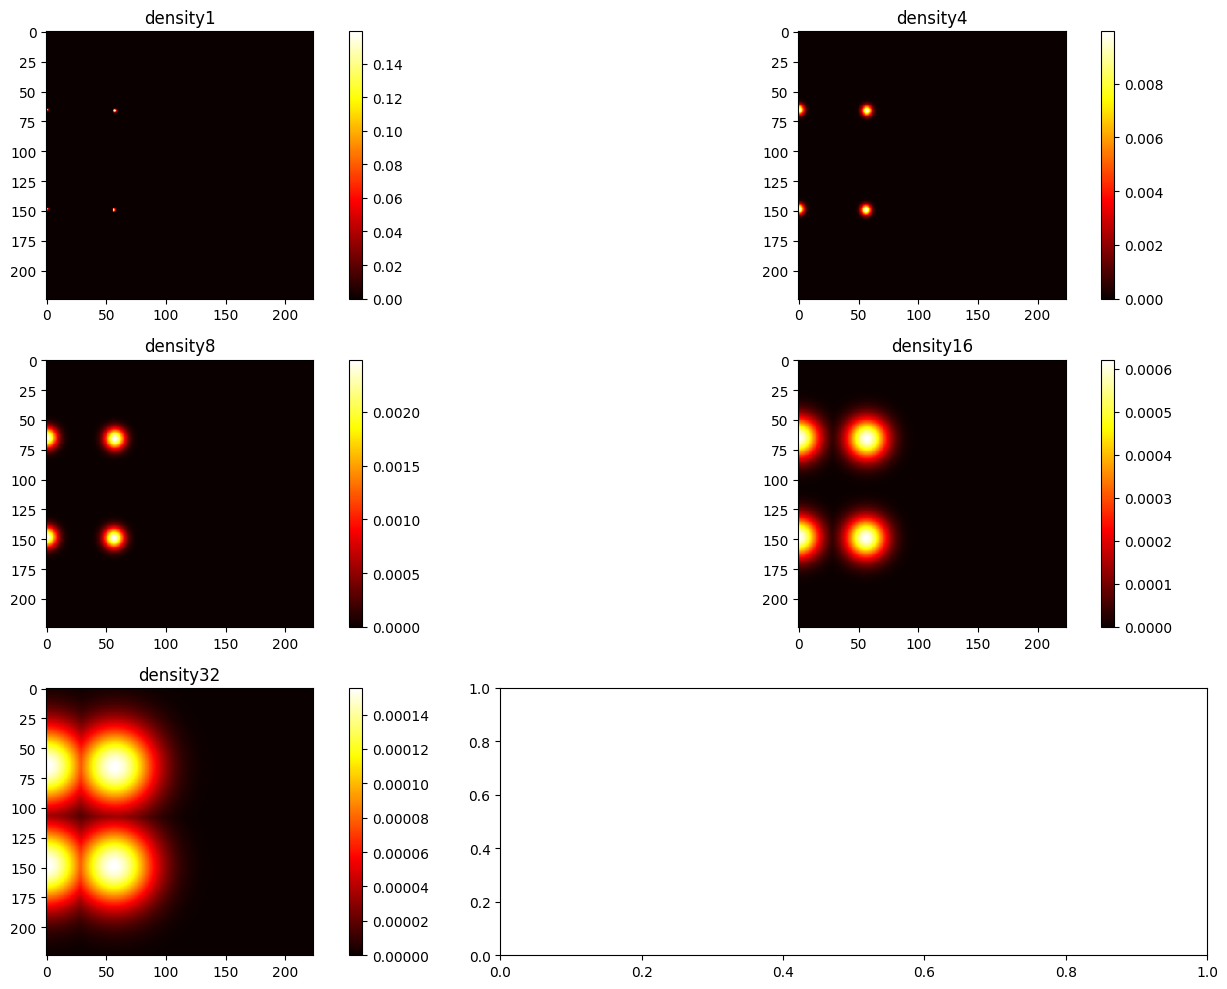

In [ ]:
affichage_density(density_1,density_4,density_8,density_16,density_32)

# Chargement des données

In [ ]:
#classe doit retourner 4 listes:  l'image rgb , la segmentation, la tsd map , la gaussienne_density map
# c'est a ce mm la que sont separé les données en data set train, validation et teste
class Load_Images(Dataset): # boucler sur les nom des matrice tsd
    def __init__(self, liste_noms_tsd, img_folder , segmentation_folder , tsd_folder , density_folder , t , s, h , w  , palette  , transform=None  ):
      self.data = []
      self.TDS = []
      self.Density = []
      self.Segmentation = []
      self.transform = transform
      with tqdm.tqdm(total = len(liste_noms_tsd), desc="Loading images and data" , colour = palette ) as pbar:
        for index in range (len(liste_noms_tsd)):
          # ajouter une condition sur le path
          image =  io.imread(os.path.join(img_folder,liste_noms_tsd[index].split(".")[0] + '.jpg'))# Load the image
          image = skimage.transform.resize(image, (h,w))

          if np.shape(np.shape(image))[0]== 3 :
            image = torch.tensor(image)
            image = image.permute(2, 0, 1)
            self.data.append(image)

            tds = np.load(os.path.join(tsd_folder,str(t),liste_noms_tsd[index]))
            tds  = torch.tensor(tds)

            # normalisation
            min_tsd = tds.min().item()
            max_tsd = tds.max().item()
            ones_tensor = torch.ones((tds.size(0),tds.size(1)))


            tds = (((tds - min_tsd) / (max_tsd - min_tsd)) * 2) - ones_tensor

            self.TDS.append(tds)

            density = np.load(os.path.join(density_folder, str(s) , liste_noms_tsd[index]))
            density  = torch.tensor(density)


            # normalisation de la density map
            min_val = density.min().item()
            max_val = density.max().item()
            density = (density - min_val) / (max_val - min_val)

            self.Density.append(density)

            segmentation_map =  io.imread(os.path.join(segmentation_folder, liste_noms_tsd[index].split(".")[0] + '.png'))# Load the image
            segmentation_map = np.where(segmentation_map == 0, 0, 1)
            segmentation_map  = torch.tensor(segmentation_map)
            self.Segmentation.append(segmentation_map)

            pbar.update()

    def __len__(self):
      return len(self.data)

    def __getitem__(self,index):
      return self.data[index] , self.TDS[index] , self.Density[index] , self.Segmentation[index]

    def index_split_train_data( self , len_train , len_val , len_test , nombre_max ,liste_noms_tsd):
      j = 0
      list_index_validation = []

      list_index_train = random.sample(range(nombre_max), len_train)

      while j < len_val :
        nombre = random.randint(0, nombre_max)
        if nombre not in list_index_train:
          list_index_validation.append(nombre)
          j+= 1


      list_index_test = list(set(list(range(nombre_max))) - set(list_index_train + list_index_validation))
      list_index_test = list_index_test[0:len_test]
      nom_image_test = [liste_noms_tsd[ind] for ind in list_index_test ]

      return list_index_train , list_index_validation , list_index_test,nom_image_test

    def slit_data_train_validation(self , liste_index_train , list_index_validation , list_index_text):

      X_image_train = [self.data[i] for i in liste_index_train]
      X_image_validation = [self.data[i] for i in list_index_validation]
      X_image_text = [self.data[i] for i in list_index_text]

      TSD_train = [self.TDS[i] for i in liste_index_train]
      TSD_validation = [self.TDS[i] for i in list_index_validation]
      TSD_text = [self.TDS[i] for i in list_index_text]

      density_train = [self.Density[i] for i in liste_index_train]
      density_validation = [self.Density[i] for i in list_index_validation]
      density_text = [self.Density[i] for i in list_index_text]

      segmentation_train = [self.Segmentation[i] for i in liste_index_train]
      segmentation_validation = [self.Segmentation[i] for i in list_index_validation]
      segmentation_text = [self.Segmentation[i] for i in list_index_text]

      data_train = (X_image_train , TSD_train,density_train,segmentation_train)
      data_Validation = (X_image_validation , TSD_validation,density_validation,segmentation_validation)
      data_test = (X_image_text , TSD_text,density_text,segmentation_text)

      #X_train, X_Validation, y_train, y_Validation = train_test_split(self.data, test_size=test_sizee, random_state=42)
      return data_train ,  data_Validation , data_test


In [ ]:
#/usr/local/lib/python3.10/dist-packages/tqdm/std.py:161: TqdmWarning: Unknown colour ((0, 0, 255)); valid choices: [hex (#00ff00), BLACK, RED, GREEN, YELLOW, BLUE, MAGENTA, CYAN, WHITE]


# tester les fonction
#nom_images =  ['000000233559.npy', '000000257575.npy', '000000274425.npy']


nom_images = images(TRAIN_TSD_DIRECTORY)
#print(nom_images)
print(nom_images)
image_names_train_val = nom_images
image_names_test = nom_images
n_train = int(len(nom_images) * 0.7)
n_val = int(len(nom_images) * 0.15) # ou 0.20
n_test = int(len(nom_images) * 0.15) # ou 0.10


image_load =  Load_Images(liste_noms_tsd = image_names_train_val ,
                                     img_folder = TRAIN_IMAGES_DIRECTORY ,
                                    segmentation_folder = TRAIN_SEGMENTATION_DIRECTORY ,
                                    tsd_folder = TRAIN_TSD_DIRECTORY,
                                    density_folder = TRAIN_DENSITY_DIRECTORY,
                                    t = 10,
                                    s = 4,
                                     h = 224 ,
                                     w = 224 ,
                                    transform = None ,
                                    palette =  "green") # couleur de la bare de progression ne fonctionne pas


#liste_noms_images, img_folder , segmentation_folder , tsd_folder , density_folder , h , w  , palette  , transform=None

['000000041441.npy', '000000129579.npy', '000000082522.npy', '000000148678.npy', '000000177867.npy', '000000068941.npy', '000000151878.npy', '000000039138.npy', '000000184224.npy', '000000141261.npy', '000000143013.npy', '000000048111.npy', '000000216331.npy', '000000083774.npy', '000000055432.npy', '000000042553.npy', '000000072994.npy', '000000214583.npy', '000000058700.npy', '000000167063.npy', '000000163950.npy', '000000005370.npy', '000000148141.npy', '000000183093.npy', '000000224578.npy', '000000124965.npy', '000000008296.npy', '000000121238.npy', '000000017313.npy', '000000017452.npy', '000000139460.npy', '000000176349.npy', '000000249958.npy', '000000135499.npy', '000000182957.npy', '000000201901.npy', '000000177599.npy', '000000020409.npy', '000000256902.npy', '000000033628.npy', '000000169342.npy', '000000111256.npy', '000000056343.npy', '000000030024.npy', '000000004164.npy', '000000143485.npy', '000000278363.npy', '000000273951.npy', '000000243912.npy', '000000167319.npy',

Loading images and data: 100%|██████████| 998/998 [01:09<00:00, 14.29it/s]


In [ ]:
n_train = int(len(nom_images) * 0.7)
n_val = int(len(nom_images) * 0.15) # ou 0.20
n_test = int(len(nom_images) * 0.15) # ou 0.10

for_split_train , for_split_validation , for_split_test , nom_image_test = image_load.index_split_train_data(len_train = n_train,
                                                                                            len_val = n_val,
                                                                                            len_test = n_test,
                                                                                            nombre_max = len(nom_images) - 1,
                                                                                            liste_noms_tsd = image_names_train_val)

'''
for_split_train , for_split_validation , for_split_test = image_load.index_split_train_data(len_train = 1,
                                                                                            len_val = 1,
                                                                                            len_test = 1,
                                                                                            nombre_max = len(nom_images) - 1)
'''

'\nfor_split_train , for_split_validation , for_split_test = image_load.index_split_train_data(len_train = 1,\n                                                                                            len_val = 1,\n                                                                                            len_test = 1,\n                                                                                            nombre_max = len(nom_images) - 1)\n'

In [ ]:
train , validation , test  = image_load.slit_data_train_validation(liste_index_train = for_split_train,
                                      list_index_validation = for_split_validation,
                                        list_index_text = for_split_test)


In [ ]:
def to_tensor_dataset(data):
    X_image = torch.stack(data[0])
    TSD = torch.stack(data[1])
    density = torch.stack(data[2])
    segmentation = torch.stack(data[3])

    return torch.utils.data.TensorDataset(X_image, TSD, density, segmentation)


In [ ]:
train_dataset = to_tensor_dataset(train)
validation_dataset = to_tensor_dataset(validation)
test_dataset = to_tensor_dataset(test)

batch_size_var = 3
#batch_size_var = 1

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size_var, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=batch_size_var, shuffle=False , drop_last = True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1, shuffle=False  ,drop_last = True)

In [ ]:
print(test_loader)

In [ ]:
for batch_data in validation_loader:
    # batch_data contient un mini-batch de données

    # Accédez aux données et aux étiquettes directement dans le tuple
    image, etiquette1, etiquette2, etiquette3 = batch_data

    # Ajoutez des impressions pour vérifier les dimensions
    print("Image shape:", image.shape)
    print("Etiquette1 shape:", etiquette1.shape , etiquette1.dtype)
    print("Etiquette2 shape:", etiquette2.shape , etiquette2.dtype)
    print("Etiquette3 shape:", etiquette3.shape , etiquette3.dtype)


Image shape: torch.Size([3, 3, 224, 224])
Etiquette1 shape: torch.Size([3, 224, 224]) torch.float64
Etiquette2 shape: torch.Size([3, 224, 224]) torch.float64
Etiquette3 shape: torch.Size([3, 224, 224]) torch.int64
Image shape: torch.Size([3, 3, 224, 224])
Etiquette1 shape: torch.Size([3, 224, 224]) torch.float64
Etiquette2 shape: torch.Size([3, 224, 224]) torch.float64
Etiquette3 shape: torch.Size([3, 224, 224]) torch.int64
Image shape: torch.Size([3, 3, 224, 224])
Etiquette1 shape: torch.Size([3, 224, 224]) torch.float64
Etiquette2 shape: torch.Size([3, 224, 224]) torch.float64
Etiquette3 shape: torch.Size([3, 224, 224]) torch.int64
Image shape: torch.Size([3, 3, 224, 224])
Etiquette1 shape: torch.Size([3, 224, 224]) torch.float64
Etiquette2 shape: torch.Size([3, 224, 224]) torch.float64
Etiquette3 shape: torch.Size([3, 224, 224]) torch.int64
Image shape: torch.Size([3, 3, 224, 224])
Etiquette1 shape: torch.Size([3, 224, 224]) torch.float64
Etiquette2 shape: torch.Size([3, 224, 224]) 

In [ ]:

def affichage_data(data_pytorch):

  fig, axs = plt.subplots(2, 2, figsize=(10, 8))

  # image
  image = axs[0, 0].imshow(data_pytorch[0][0].permute(1, 2, 0).numpy())
  axs[0, 0].set_title('image')


  # masque
  masque =  axs[0, 1].imshow(data_pytorch[3][0].numpy())
  axs[0, 1].set_title('masque')

  # tsd
  tsd = axs[1, 0].imshow(data_pytorch[1][0], cmap='RdGy')
  axs[1, 0].set_title('tsd')
  fig.colorbar(tsd, ax=axs[1, 0])

  # density .permute(1, 0)
  density = axs[1, 1].imshow(data_pytorch[2][0], cmap='hot')
  axs[1, 1].set_title('density')
  fig.colorbar(density, ax=axs[1, 1])

  # Ajustement de l'espacement
  plt.tight_layout()

  # Affichage des graphiques
  plt.show()


In [ ]:
affichage_data(train)

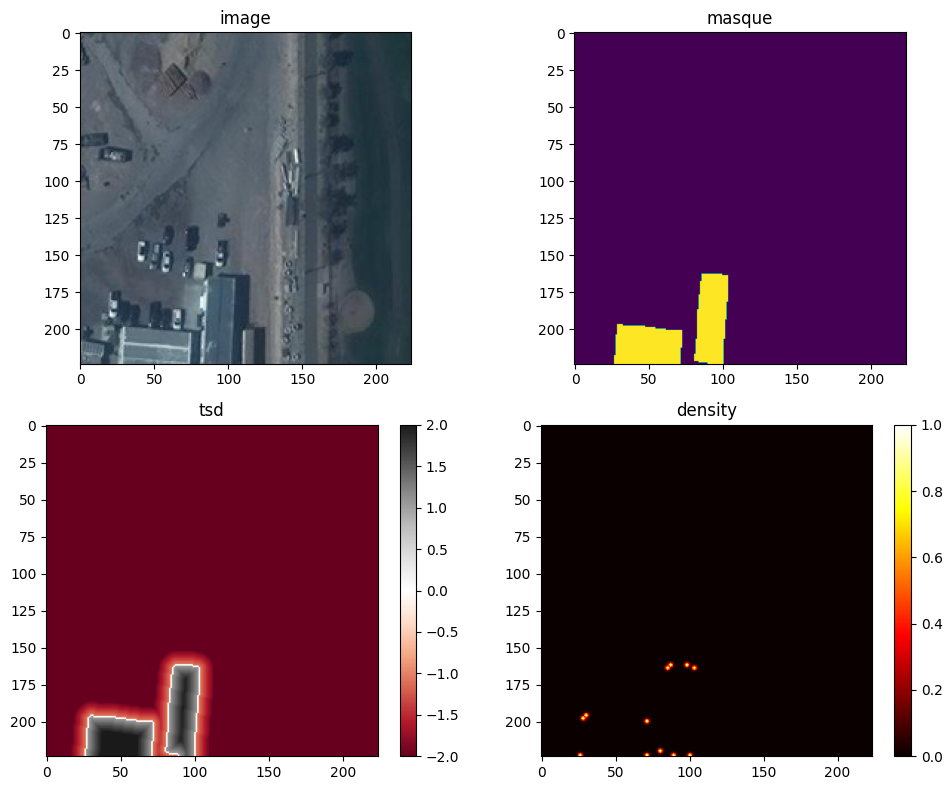

In [ ]:
affichage_data(validation)

# LE MODELE

In [ ]:
!pip install segmentation-models-pytorch

In [ ]:
!pip install torchsummary


In [ ]:
import segmentation_models_pytorch as smp

In [ ]:
import torch
import torch.nn as nn

class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(BasicBlock, self).__init__()
        # Votre initialisation pour le bloc de base ici
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.stride = stride

    def forward(self, x):
        # La logique de propagation avant pour le bloc de base ici
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        # Ajouter l'identité résiduelle
        out += identity #

        out = self.relu(out)

        return out
# verifier sur le basick bloc definie bien le backbone


double branched modele

In [ ]:
import torch
import torch.nn as nn
import segmentation_models_pytorch as smp

class TSDPredictionModel(nn.Module):
    def __init__(self, in_channels_rgb):
        super(TSDPredictionModel, self).__init__()
        # **Modèle Unet pour l'extraction des caractéristiques des images RGB**
        # Ce modèle Unet est pré-entraîné sur l'ensemble de données ImageNet. Il est utilisé pour extraire les caractéristiques des images RGB.
        self.unet_model = smp.Unet('resnet101', encoder_weights='imagenet', in_channels=in_channels_rgb, classes= 128) # initialement dans mon code classes=1
        #self.features_extractor = nn.Sequential(*list(unet_model.children())[:-1])


        # **TSD Regressor pour prédire la TSD**
        # Ce modèle utilise une couche de convolution pour prédire la TSD.

        self.tsd_regressor = nn.Sequential(
            # Première couche de convolution avec activation et normalisation
            nn.Conv2d(128, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            #nn.MaxPool2d(kernel_size=2, stride=2),

            # Bloc résiduel pour augmenter la capacité du modèle
            BasicBlock(64, 64),

            # Autre couche de convolution avec activation et normalisation
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            #nn.Dropout(0.4),

            #nn.Dropout(0.1),
            #nn.MaxPool2d(kernel_size=2, stride=2),
            #nn.Upsample(scale_factor=4, mode='bilinear', align_corners=False),

            # Réduction du nombre de canaux pour la sortie
            nn.Conv2d(64, 1, kernel_size=1),
            nn.Tanh(),


        )
            #nn.Tanh()
            # **gaussian_density_map**
            # **First branch for task 1**
            # Cette branche du modèle est utilisée pour prédire la carte de densité gaussienne. Elle utilise une couche de convolution pour prédire la moyenne et la variance d'une distribution gaussienne pour chaque pixel de l'image.
        """
        self.branch1 = nn.Sequential(
            nn.Conv2d(2, 64, 3, padding=1),
            nn.ReLU(),
            BasicBlock(64, 64),  # Bloc résiduel existant
            BasicBlock(64, 64),  # Bloc résiduel supplémentaire
            nn.ReLU(),
            nn.Conv2d(64, 1, 1),
            nn.Sigmoid()
        )"""
        self.branch1 = nn.Sequential(
            nn.Conv2d(128 + 1 , 64, kernel_size=1,stride=1,padding=0,bias=True),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            BasicBlock(64, 64),  # Ajouter des BasicBlocks supplémentaires

            #nn.Dropout(0.4),
            #nn.MaxPool2d(kernel_size=2, stride=2),
            #nn.Upsample(scale_factor=2, mode='bilinear', align_corners=False),

            nn.Conv2d(64, 1, kernel_size=1,stride=1,padding=0,bias=True),
            nn.Sigmoid())

        # **Second branch for task 2**
        # Cette branche du modèle est utilisée pour prédire la matrice binaire de segmentation. Elle utilise une couche de convolution pour prédire une valeur binaire (0 ou 1) pour chaque pixel de l'image.

        self.branch2 = nn.Sequential(
            nn.Conv2d(128 + 1 , 64, 3, padding=1), # 64 + 1
            nn.ReLU(),
            # Bloc résiduel de ResNet
            ##BasicBlock(64, 64),
            nn.ReLU(),
            #nn.Dropout(0.5),
            #nn.MaxPool2d(kernel_size=2, stride=2),
            #nn.Upsample(scale_factor=2, mode='bilinear', align_corners=False),

            nn.Conv2d(64, 1, 1),
            # Sigmoid pour renvoyer une matrice binaire de 0 et 1
            # doit renvoyer une proba
            nn.Sigmoid()
        )

    def forward(self, rgb_images):

      # definir les hooks (tsd_regressor_hook, branch1_hook, branch2_hook)

      self.features = {}

      # Hook pour Unet model
      def unet_hook(module, input, output):
        self.features['unet'] = output

      # Hook pour TSD regressor
      def tsd_regressor_hook(module, input, output):
        self.features['tsd_regressor'] = output

      # Hook pour Branch1
      def branch1_hook(module, input, output):
        self.features['branch1'] = output

      # Hook pour Branch2
      def branch2_hook(module, input, output):
        self.features['branch2'] = output

      # Attacher les hooks
      #les  hooks sont ensuite exécutés à chaque fois que les modules effectuent leur propagation avant (forward pass).
      self.unet_model.register_forward_hook(unet_hook)
      self.tsd_regressor.register_forward_hook(tsd_regressor_hook)
      self.branch1.register_forward_hook(branch1_hook)
      self.branch2.register_forward_hook(branch2_hook)


      # Propagation avant à travers les modules
      # Extraction des caractéristiques à partir des images RGB


      features = self.unet_model(rgb_images)


      #print(features.shape)

      #features_extractor = self.features_extractor(features)

      # Prédiction de la TSD à partir des caractéristiques

      tsd_prediction = self.tsd_regressor(features)
      # upsampling
      #tsd_upsampled = nn.functional.interpolate(tsd_prediction, size=features.shape[2:], mode='bilinear', align_corners=False)


      concatenation  = torch.cat((features, tsd_prediction), dim=1)


      # utiliser concatenation des featurs et de la matrice tsd predite  pour predir la map de densité gaussienne
      branch1_output = self.branch1(concatenation)
      #branch1_output = self.branch1(features)

      branche_2_output = self.branch2(concatenation)



      return tsd_prediction , branch1_output , branche_2_output

# Utilisation de la classe TSDPredictionModel
model = TSDPredictionModel(in_channels_rgb=3)  # Assurez-vous que les valeurs d'in_channels correspondent à votre entrée
#print(summary(model.cuda(), input_size=(3,224,224)))

# Entrainement

In [ ]:
#dummy_sample = torch.zeros(3,3,224,224)
dummy_sample  = torch.rand(4, 3, 224, 224)

m1 = model(dummy_sample)
print(m1[0].shape)
print(m1[1]) # VERIFIER LA DIMENTION DES  m1[0]
print(m1[2].shape)

torch.Size([4, 1, 224, 224])
tensor([[[[0.4561, 0.3198, 0.3551,  ..., 0.4544, 0.3710, 0.5553],
          [0.4767, 0.3630, 0.5130,  ..., 0.3532, 0.5745, 0.6198],
          [0.3876, 0.4056, 0.4428,  ..., 0.3287, 0.4583, 0.5001],
          ...,
          [0.3972, 0.4540, 0.6422,  ..., 0.2777, 0.4249, 0.5275],
          [0.2841, 0.2950, 0.5299,  ..., 0.5133, 0.6210, 0.4476],
          [0.3525, 0.4440, 0.3816,  ..., 0.4738, 0.4642, 0.5792]]],


        [[[0.2393, 0.4636, 0.4658,  ..., 0.2846, 0.2994, 0.4893],
          [0.4677, 0.4857, 0.5656,  ..., 0.3870, 0.4530, 0.3807],
          [0.4389, 0.5595, 0.5103,  ..., 0.3002, 0.4170, 0.5104],
          ...,
          [0.3933, 0.4600, 0.4883,  ..., 0.4683, 0.5590, 0.4646],
          [0.4026, 0.3804, 0.6425,  ..., 0.3911, 0.5683, 0.4380],
          [0.3975, 0.5120, 0.6114,  ..., 0.3272, 0.3798, 0.5563]]],


        [[[0.4276, 0.5201, 0.3302,  ..., 0.3541, 0.2836, 0.5651],
          [0.4249, 0.6402, 0.6101,  ..., 0.3799, 0.4654, 0.4490],
         

In [ ]:
print(model)

TSDPredictionModel(
  (unet_model): Unet(
    (encoder): ResNetEncoder(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (re

In [ ]:
def affichage_carte_carracteristique(le_model):
  fig, axs = plt.subplots(1, len(le_model), figsize=(20, 5))

  e = 0
  # Visualiser les cartes des caractéristiques pour chaque couche
  for layer_name, feature_maps in le_model.items():

    heatmap = axs[e].imshow(feature_maps[0, 0].detach().cpu(), cmap='viridis')
    axs[e].set_title(layer_name)
    fig.colorbar(heatmap, ax=axs[e],shrink=0.5)
    e += 1
  plt.tight_layout()

  # Affichage des graphiques
  plt.show()

In [ ]:
def binarized_Gaussian_map_thre_0(gaussian_truth):
  return (gaussian_truth > 0).type(gaussian_truth.dtype)

#np.where(gaussian_truth > 0, 1, 0)

In [ ]:
def afficher_image(image):
  print(image.size())
  image = image.permute(0,2, 3, 1)[0]
  matrice_cpu = image.cpu()

  # Convertir en tableau NumPy
  matrice_np = matrice_cpu.numpy()
  fig, axs = plt.subplots(1,1, figsize=(10, 8))
  image = axs.imshow(matrice_np)
  axs.set_title('image')
  plt.tight_layout()

  # Affichage des graphiques
  plt.show()




In [ ]:
def affichage_segmentation(segmentation_truth, predicted_predicted):

    segmentation_truth = segmentation_truth.permute(0,1,2)
    predicted_predicted = predicted_predicted.permute(0,2,3,1)
    segmentation_truth =segmentation_truth[0]
    predicted_predicted = predicted_predicted[0]

    segmentation_truth_cpu = segmentation_truth.cpu()
    segmentation_truth_np = segmentation_truth_cpu.numpy()
    print(segmentation_truth_np.shape)
    predicted_predicted_cpu = predicted_predicted.cpu()
    predicted_predicted_np = predicted_predicted_cpu.detach().numpy()

    fig, axs = plt.subplots(1,2, figsize=(30, 15))

    segmentation_trut = axs[0].imshow(segmentation_truth_np )
    axs[0].set_title('segmentation_truth')

    fig.colorbar(segmentation_trut, ax=axs[ 0],shrink=0.5)
    predicted_predicte = axs[ 1].imshow(predicted_predicted_np )
    axs[1].set_title('segmentation_predicted')

    fig.colorbar(predicted_predicte, ax=axs[ 1],shrink=0.5)
    plt.tight_layout()

    # Affichage des graphiques
    plt.show()


In [ ]:
def affichage_tsd(tsd_truth, tsd_predicted):

    tsd_truth = tsd_truth.permute(0,1,2)
    tsd_predicted = tsd_predicted.permute(0,2,3,1)
    tsd_truth =tsd_truth[0]
    tsd_predicted = tsd_predicted[0]

    tsd_truth_cpu = tsd_truth.cpu()
    tsd_truth_np = tsd_truth_cpu.numpy()

    tsd_predicted_cpu = tsd_predicted.cpu()
    tsd_predicted_np = tsd_predicted_cpu.detach().numpy()

    fig, axs = plt.subplots(1,2, figsize=(30, 15))
    tsd_true = axs[0].imshow(tsd_truth_np, cmap='RdGy')
    axs[0].set_title('TSD_truth')
    fig.colorbar(tsd_true, ax=axs[ 0],shrink=0.5)

    tsd_pred = axs[ 1].imshow(tsd_predicted_np, cmap='RdGy' , vmin = -1, vmax = 1 )
    axs[1].set_title('TSD_predicted')
    fig.colorbar(tsd_pred, ax=axs[ 1],shrink=0.5)
    plt.tight_layout()

    # Affichage des graphiques
    plt.show()


In [ ]:
def affichage_data_density(density_truth, density_predicted):

    density_truth = density_truth.permute(0,1,2)
    density_predicted = density_predicted.permute(0,2,3,1)
    density_truth =density_truth[0]
    density_predicted = density_predicted[0]

    density_truth_cpu = density_truth.cpu()
    density_truth_np = density_truth_cpu.numpy()

    density_predicted_cpu = density_predicted.cpu()
    density_predicted_np = density_predicted_cpu.detach().numpy()


    fig, axs = plt.subplots(1,2, figsize=(30, 15))


    density_true = axs[0].imshow(density_truth_np, cmap='hot')
    axs[0].set_title('density_truth')
    fig.colorbar(density_true, ax=axs[ 0],shrink=0.5)

    density_pred = axs[ 1].imshow(density_predicted_np, cmap='hot' , vmin = density_predicted.min(), vmax = density_predicted.max() )
    axs[1].set_title('density_predicted')
    fig.colorbar(density_pred, ax=axs[ 1],shrink=0.5)


    # Ajustement de l'espacement
    plt.tight_layout()

    # Affichage des graphiques
    plt.show()


In [ ]:
def L_G(density_truth, density_predicted, binarized_gaussian_truth):


    N0 = (binarized_gaussian_truth == 0 ).sum().cpu().item()
    N1 = (binarized_gaussian_truth > 0).sum().cpu().item()


    #δ(t ij b ​ −1) renvoie 1 lorsque  t ij b ​ est égal à 1, et 0 autrement.
    # δ(t ij b ​ ) renvoie 1 lorsque t ij b ​ est différent de 0, et 0 quand � � � � t ij b ​ est 0.



    sigma_tijb = (binarized_gaussian_truth == 0).int()

    sigma_tijb_1 =  (binarized_gaussian_truth == 1).int()

    # Calculer les différences entre les prédictions et les vérités

    differences = (density_predicted - density_truth)**2
    terme_1 = (sigma_tijb_1 / N1 ) * differences
    terme_2 = (sigma_tijb / N0 ) * differences
    res = terme_1 + terme_2

    l_g = res.sum().item()
    return l_g

In [ ]:
criterion = nn.MSELoss()
BCE_loss = nn.BCELoss()

In [ ]:
#optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
#optimizer = torch.optim.SGD(model.parameters(), lr=0.01) # , weight_decay=0.001
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
print(optimizer)

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

'''
device = torch.device('cpu')
print('Using device:', device)
'''

Using device: cuda


"\ndevice = torch.device('cpu')\nprint('Using device:', device)\n"

Starting epoch number 0


  0%|          | 0/233 [00:00<?, ?it/s]

At epoch #0, loss = 1.9393418853375022


  0%|          | 0/49 [00:00<?, ?it/s]

At epoch #0, validation loss = 1.9982725235880638
Starting epoch number 1


  0%|          | 0/233 [00:00<?, ?it/s]

At epoch #1, loss = 1.8591867040666898


  0%|          | 0/49 [00:00<?, ?it/s]

At epoch #1, validation loss = 1.8203178571195018
Starting epoch number 2


  0%|          | 0/233 [00:00<?, ?it/s]

At epoch #2, loss = 1.854663520411872


  0%|          | 0/49 [00:00<?, ?it/s]

At epoch #2, validation loss = 1.8536156464596183
Starting epoch number 3


  0%|          | 0/233 [00:00<?, ?it/s]

At epoch #3, loss = 1.8818099242934854


  0%|          | 0/49 [00:00<?, ?it/s]

At epoch #3, validation loss = 1.8185049538709679
Starting epoch number 4


  0%|          | 0/233 [00:00<?, ?it/s]

At epoch #4, loss = 1.8039686823095886


  0%|          | 0/49 [00:00<?, ?it/s]

At epoch #4, validation loss = 1.6733624205297353
Starting epoch number 5


  0%|          | 0/233 [00:00<?, ?it/s]

At epoch #5, loss = 1.7131173620919813


  0%|          | 0/49 [00:00<?, ?it/s]

At epoch #5, validation loss = 1.7263531636218636
Starting epoch number 6


  0%|          | 0/233 [00:00<?, ?it/s]

At epoch #6, loss = 1.705720436931168


  0%|          | 0/49 [00:00<?, ?it/s]

At epoch #6, validation loss = 1.7484615749242354
Starting epoch number 7


  0%|          | 0/233 [00:00<?, ?it/s]

At epoch #7, loss = 1.6716943595542417


  0%|          | 0/49 [00:00<?, ?it/s]

At epoch #7, validation loss = 1.5592941045761108
Starting epoch number 8


  0%|          | 0/233 [00:00<?, ?it/s]

At epoch #8, loss = 1.6946097428194955


  0%|          | 0/49 [00:00<?, ?it/s]

At epoch #8, validation loss = 1.7089960721074318
Starting epoch number 9


  0%|          | 0/233 [00:00<?, ?it/s]

At epoch #9, loss = 1.7018959199921768


  0%|          | 0/49 [00:00<?, ?it/s]

At epoch #9, validation loss = 1.7367150540254555
Starting epoch number 10


  0%|          | 0/233 [00:00<?, ?it/s]

At epoch #10, loss = 1.7012654911295026


  0%|          | 0/49 [00:00<?, ?it/s]

At epoch #10, validation loss = 1.631591414918705
Starting epoch number 11


  0%|          | 0/233 [00:00<?, ?it/s]

At epoch #11, loss = 1.6012304591518616


  0%|          | 0/49 [00:00<?, ?it/s]

At epoch #11, validation loss = 1.4677868813884503
Starting epoch number 12


  0%|          | 0/233 [00:00<?, ?it/s]

At epoch #12, loss = 1.5609249449594849


  0%|          | 0/49 [00:00<?, ?it/s]

At epoch #12, validation loss = 1.5525229561085603
Starting epoch number 13


  0%|          | 0/233 [00:00<?, ?it/s]

At epoch #13, loss = 1.5190984629766113


  0%|          | 0/49 [00:00<?, ?it/s]

At epoch #13, validation loss = 2.0263342468106016
Starting epoch number 14


  0%|          | 0/233 [00:00<?, ?it/s]

At epoch #14, loss = 1.538904735970395


  0%|          | 0/49 [00:00<?, ?it/s]

At epoch #14, validation loss = 1.5538397346224104
Starting epoch number 15


  0%|          | 0/233 [00:00<?, ?it/s]

At epoch #15, loss = 1.4559245288627853


  0%|          | 0/49 [00:00<?, ?it/s]

At epoch #15, validation loss = 1.1589350201645676
Starting epoch number 16


  0%|          | 0/233 [00:00<?, ?it/s]

At epoch #16, loss = 1.4288837428768306


  0%|          | 0/49 [00:00<?, ?it/s]

At epoch #16, validation loss = 1.3022676633328807
Starting epoch number 17


  0%|          | 0/233 [00:00<?, ?it/s]

At epoch #17, loss = 1.5956961402565624


  0%|          | 0/49 [00:00<?, ?it/s]

At epoch #17, validation loss = 1.4176327330725533
Starting epoch number 18


  0%|          | 0/233 [00:00<?, ?it/s]

At epoch #18, loss = 1.6332593260916517


  0%|          | 0/49 [00:00<?, ?it/s]

At epoch #18, validation loss = 1.582612682361992
Starting epoch number 19


  0%|          | 0/233 [00:00<?, ?it/s]

At epoch #19, loss = 1.5876798435342159


  0%|          | 0/49 [00:00<?, ?it/s]

At epoch #19, validation loss = 1.9637515204293388
Starting epoch number 20


  0%|          | 0/233 [00:00<?, ?it/s]

At epoch #20, loss = 1.6255372793377725


  0%|          | 0/49 [00:00<?, ?it/s]

At epoch #20, validation loss = 1.944519658477939
Starting epoch number 21


  0%|          | 0/233 [00:00<?, ?it/s]

At epoch #21, loss = 1.6015359981888866


  0%|          | 0/49 [00:00<?, ?it/s]

At epoch #21, validation loss = 1.6168609054721133
Starting epoch number 22


  0%|          | 0/233 [00:00<?, ?it/s]

At epoch #22, loss = 1.645573377097625


  0%|          | 0/49 [00:00<?, ?it/s]

At epoch #22, validation loss = 1.6108156710254902
Starting epoch number 23


  0%|          | 0/233 [00:00<?, ?it/s]

At epoch #23, loss = 1.5349008128878385


  0%|          | 0/49 [00:00<?, ?it/s]

At epoch #23, validation loss = 1.6168072953516124
Starting epoch number 24


  0%|          | 0/233 [00:00<?, ?it/s]

At epoch #24, loss = 1.4898965701524791


  0%|          | 0/49 [00:00<?, ?it/s]

At epoch #24, validation loss = 1.0986988629613603
Starting epoch number 25


  0%|          | 0/233 [00:00<?, ?it/s]

At epoch #25, loss = 1.3504366874694824


  0%|          | 0/49 [00:00<?, ?it/s]

At epoch #25, validation loss = 1.368789470925623
Starting epoch number 26


  0%|          | 0/233 [00:00<?, ?it/s]

At epoch #26, loss = 1.3149727245257137


  0%|          | 0/49 [00:00<?, ?it/s]

At epoch #26, validation loss = 1.321420457898354
Starting epoch number 27


  0%|          | 0/233 [00:00<?, ?it/s]

At epoch #27, loss = 1.305654321873137


  0%|          | 0/49 [00:00<?, ?it/s]

At epoch #27, validation loss = 1.3402205389373156
Starting epoch number 28


  0%|          | 0/233 [00:00<?, ?it/s]

At epoch #28, loss = 1.2847275741622173


  0%|          | 0/49 [00:00<?, ?it/s]

At epoch #28, validation loss = 1.5218538800064398
Starting epoch number 29


  0%|          | 0/233 [00:00<?, ?it/s]

At epoch #29, loss = 1.3030195811787388


  0%|          | 0/49 [00:00<?, ?it/s]

At epoch #29, validation loss = 1.2370561081535962


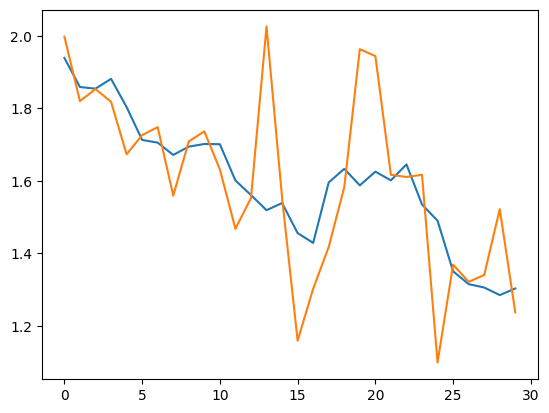

In [ ]:
from torch.autograd import Variable
from tqdm.autonotebook import tqdm #progression bar

number_epochs = 30
model.to(device)

training_losses = []
validation_losses = []

training_accuracy = []
validation_accuracy = []
model = model.float()

# à def empiriquement
alpha = 1 # tsd loss
beta = 1 # density loss
gamma = 1 # segmentation loss


for epoch in range(number_epochs):
  print("Starting epoch number " + str(epoch))

  #Training phase:
  training_loss = 0
  model.train() #indicate to the network that we enter training mode

  #X_image_train , TSD_train,density_train,segmentation_train
  for i, (inputs, tsd_map  , gaussian_map , true_semantique_segmentation) in enumerate(tqdm(train_loader)):
    #Convert the inputs and GTs to torch Variable (will hold the computation
    #graph) and send them to the computation device (i.e. GPU).
    inputs = Variable(inputs.float()).to(device)# image rgb
    true_semantique_segmentation = Variable(true_semantique_segmentation).type(torch.FloatTensor).to(device) # segmentation semantique verité terrain
    tsd_map = Variable(tsd_map).type(torch.FloatTensor).to(device) # tsd map verité terrin
    gaussian_map = Variable(gaussian_map).type(torch.FloatTensor).to(device) # gaussian map verité terrain


    #We set the gradients of the model to 0.
    optimizer.zero_grad()

    tsd_prediction , branch1_output , branche_2_output  = model(inputs)
    model_features = model.features


    TSD_loss = criterion(torch.squeeze(tsd_prediction, dim=1) , tsd_map)
    bin_Gaussian_map_thre_0 = binarized_Gaussian_map_thre_0(gaussian_map)
    L_G_loss = L_G(gaussian_map , branch1_output , bin_Gaussian_map_thre_0 )


    L_G_loss = torch.tensor(L_G_loss,  device=device ,requires_grad=True)
    #print("#############L_G_loss##############",L_G_loss)

    #BCE_loss = nn.BCELoss()
    branche_2_output_squeezed = torch.squeeze(branche_2_output, dim=1)


    BCE_loss_output = BCE_loss(branche_2_output_squeezed, true_semantique_segmentation.to(torch.float32)) # à verifier


    #TSD_loss
    loss = alpha * TSD_loss + beta * L_G_loss + gamma * BCE_loss_output

    #We accumulate the gradients...
    loss.backward()
    #...and we update the parameters according to the gradients.
    optimizer.step()
    #training_loss += loss.cpu().item() / len(train_loader)
    training_loss += loss.cpu().item()
  training_loss = training_loss / len(train_loader)
  print("At epoch #" + str(epoch) + ", loss = " + str(training_loss))
  training_losses.append(training_loss)

  #Validation phase:
  validation_loss = 0
  #You need to set the network to eval mode when using batch normalization (to
  #be consistent across evaluation samples, we use mean and stddev computed
  #during training when doing inference, as opposed to ones computed on the
  #batch) or dropout (you want to use all the parameters during inference).
  #In this exercise, we do not use these elements, so just for good practice!
  model.eval()

  #This line reduces the memory by not tracking the gradients. Also to be used
  #during inference.


  with torch.no_grad():
    for i, (inputs_1, tsd_map_1  , gaussian_map_1 , true_semantique_segmentation_1) in enumerate(tqdm(validation_loader)):
      #LongTensor
      inputs_1 = Variable(inputs_1).to(device).float()
      true_semantique_segmentation_1 = Variable(true_semantique_segmentation_1).type(torch.FloatTensor).to(device)
      tsd_map_1 = Variable(tsd_map_1).type(torch.FloatTensor).to(device)
      gaussian_map_1 = Variable(gaussian_map_1).type(torch.FloatTensor).to(device)


      pred_tsd_prediction_val , pred_branch1_output_val , pred_branche_2_output_val  = model(inputs_1)




      # calcule de la loss selon les auteurs
      TSD_loss = criterion(torch.squeeze(pred_tsd_prediction_val, dim=1) , tsd_map_1)

      bin_Gaussian_map_thre_0 = binarized_Gaussian_map_thre_0(gaussian_map_1)
      L_G_loss = L_G(gaussian_map_1 , pred_branch1_output_val , bin_Gaussian_map_thre_0 )

      branche_2_output_squeezed_1 = torch.squeeze(pred_branche_2_output_val, dim=1)


      BCE_loss_output = BCE_loss(branche_2_output_squeezed_1, true_semantique_segmentation_1.to(torch.float32))
      val_loss = alpha * TSD_loss + beta * L_G_loss + gamma * BCE_loss_output

      validation_loss += val_loss.cpu().item()



  validation_loss = validation_loss / len(validation_loader)
  print("At epoch #" + str(epoch) + ", validation loss = " + str(validation_loss))
  validation_losses.append(validation_loss)



plt.figure()
plt.plot(np.arange(len(training_losses)), training_losses)
plt.plot(np.arange(len(validation_losses)), validation_losses)
plt.show()

#Optional, if you want to save your model:
#torch.save(network.state_dict(), os.path.join(base_folder, 'WeightsVaihingen/', 'Hypercolumns_' + str(number_epochs) + "epochs.pth")
torch.save(model.state_dict(), os.path.join(SAVE_MODELE_IN, 'train_t_10_sigma_4' + str(number_epochs) + 'epochs.pth'))


<built-in method size of Tensor object at 0x78f7a434c090>
torch.Size([2, 3, 224, 224])


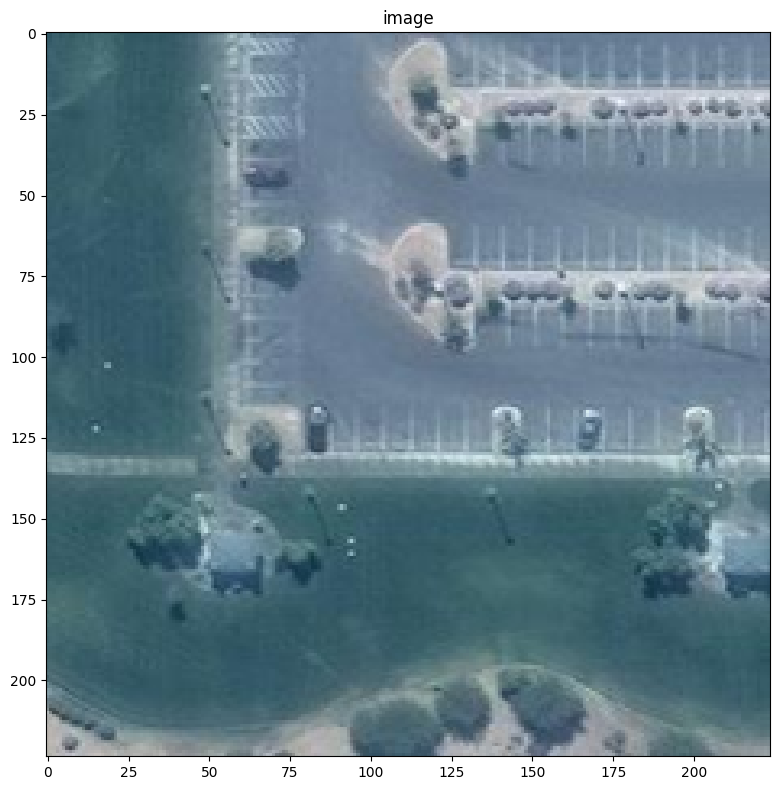

(224, 224)


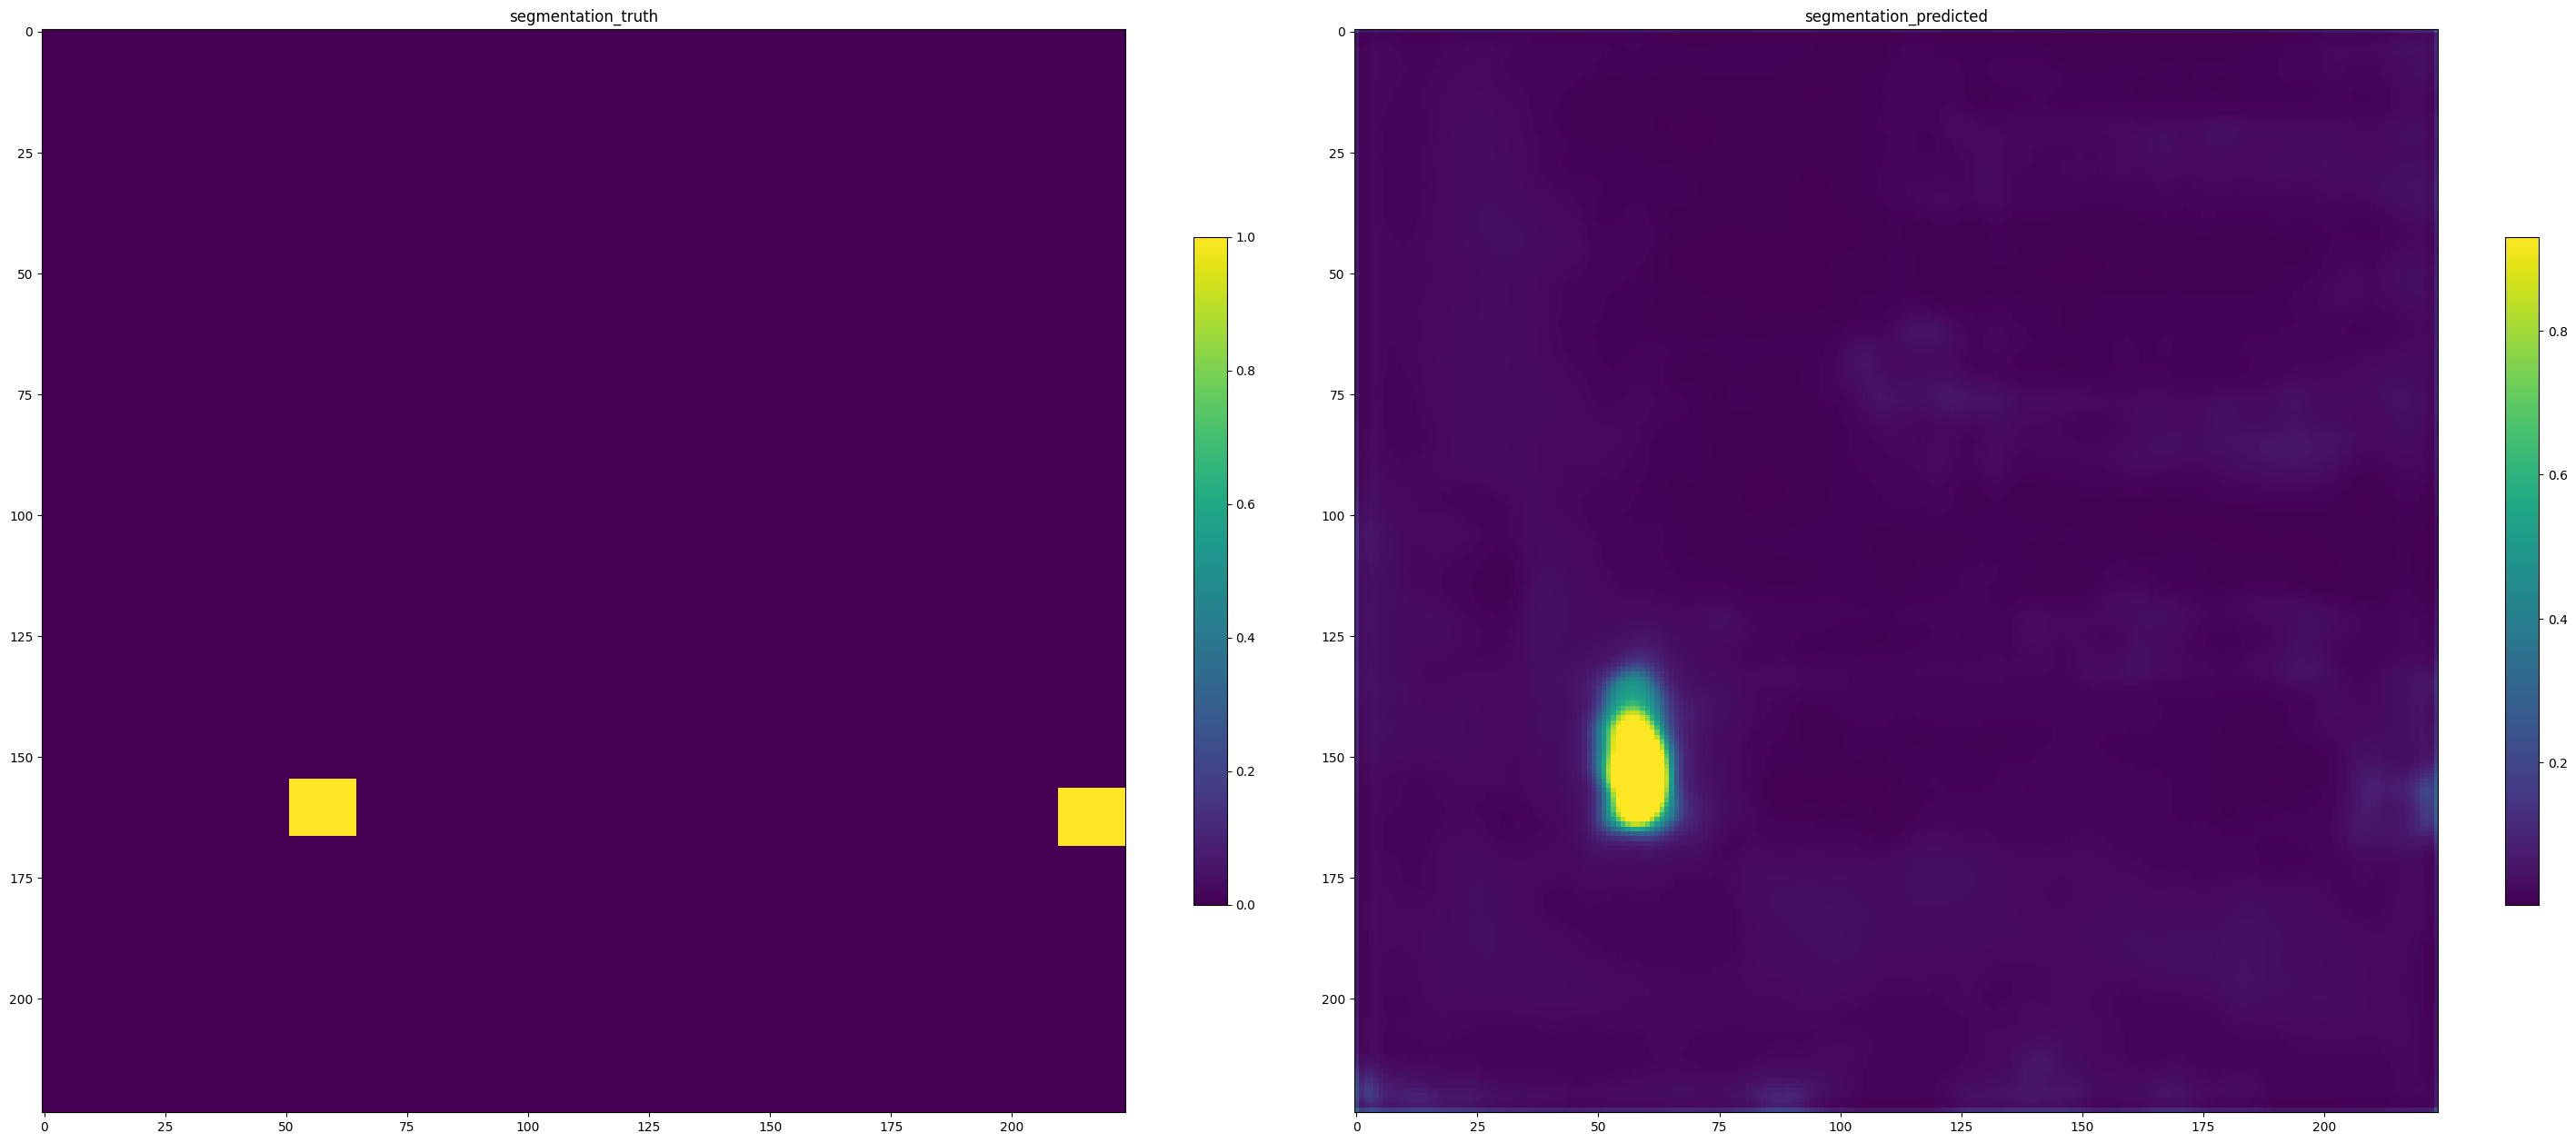

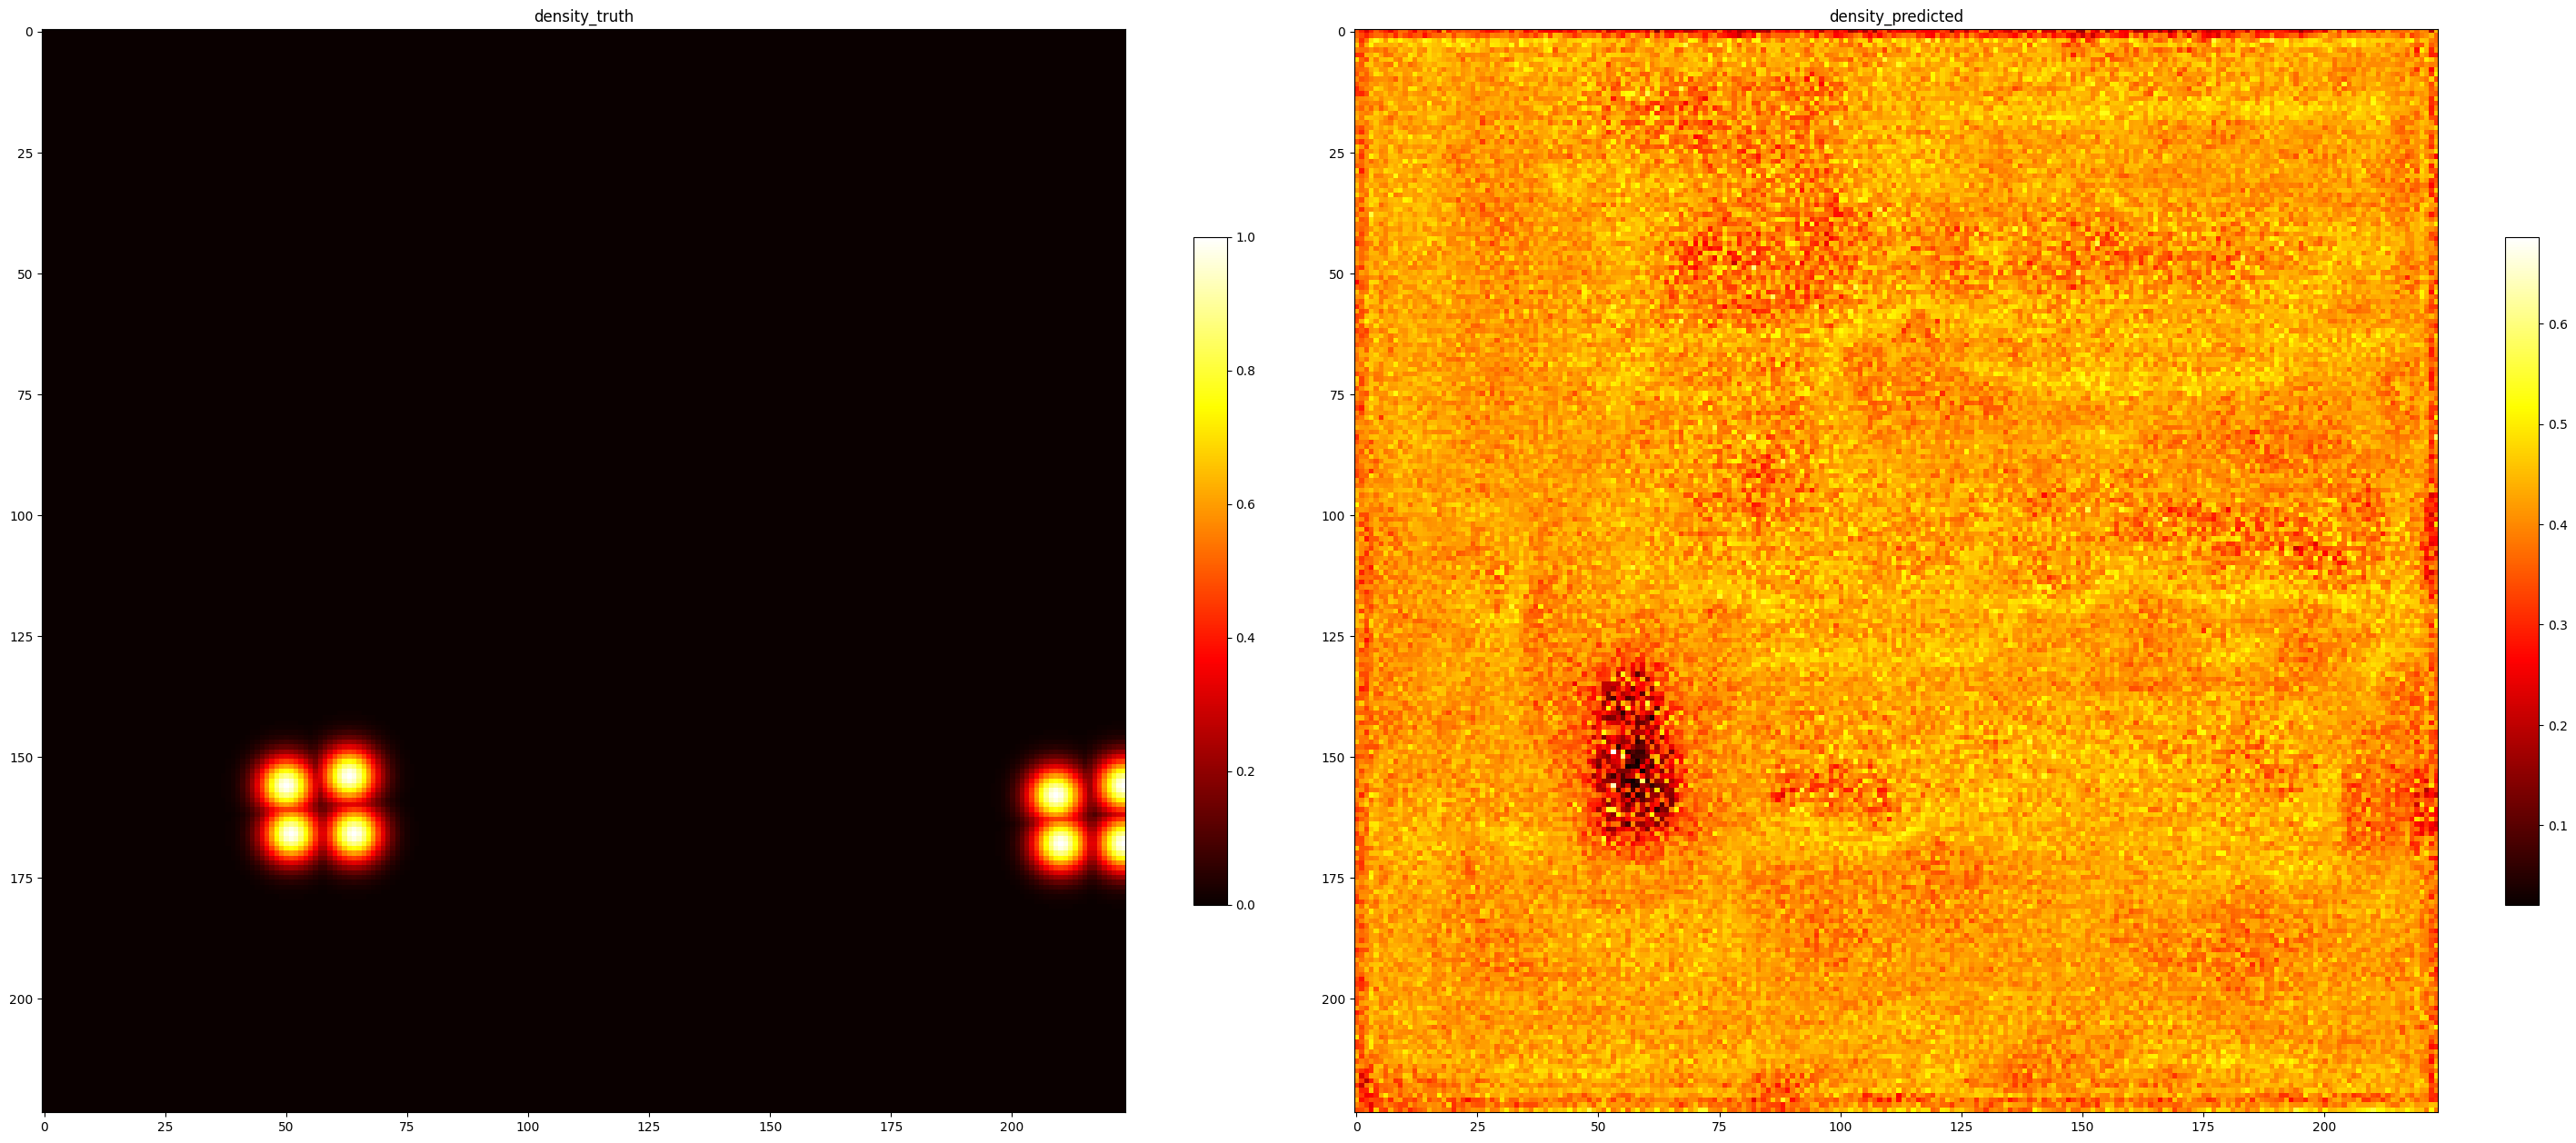

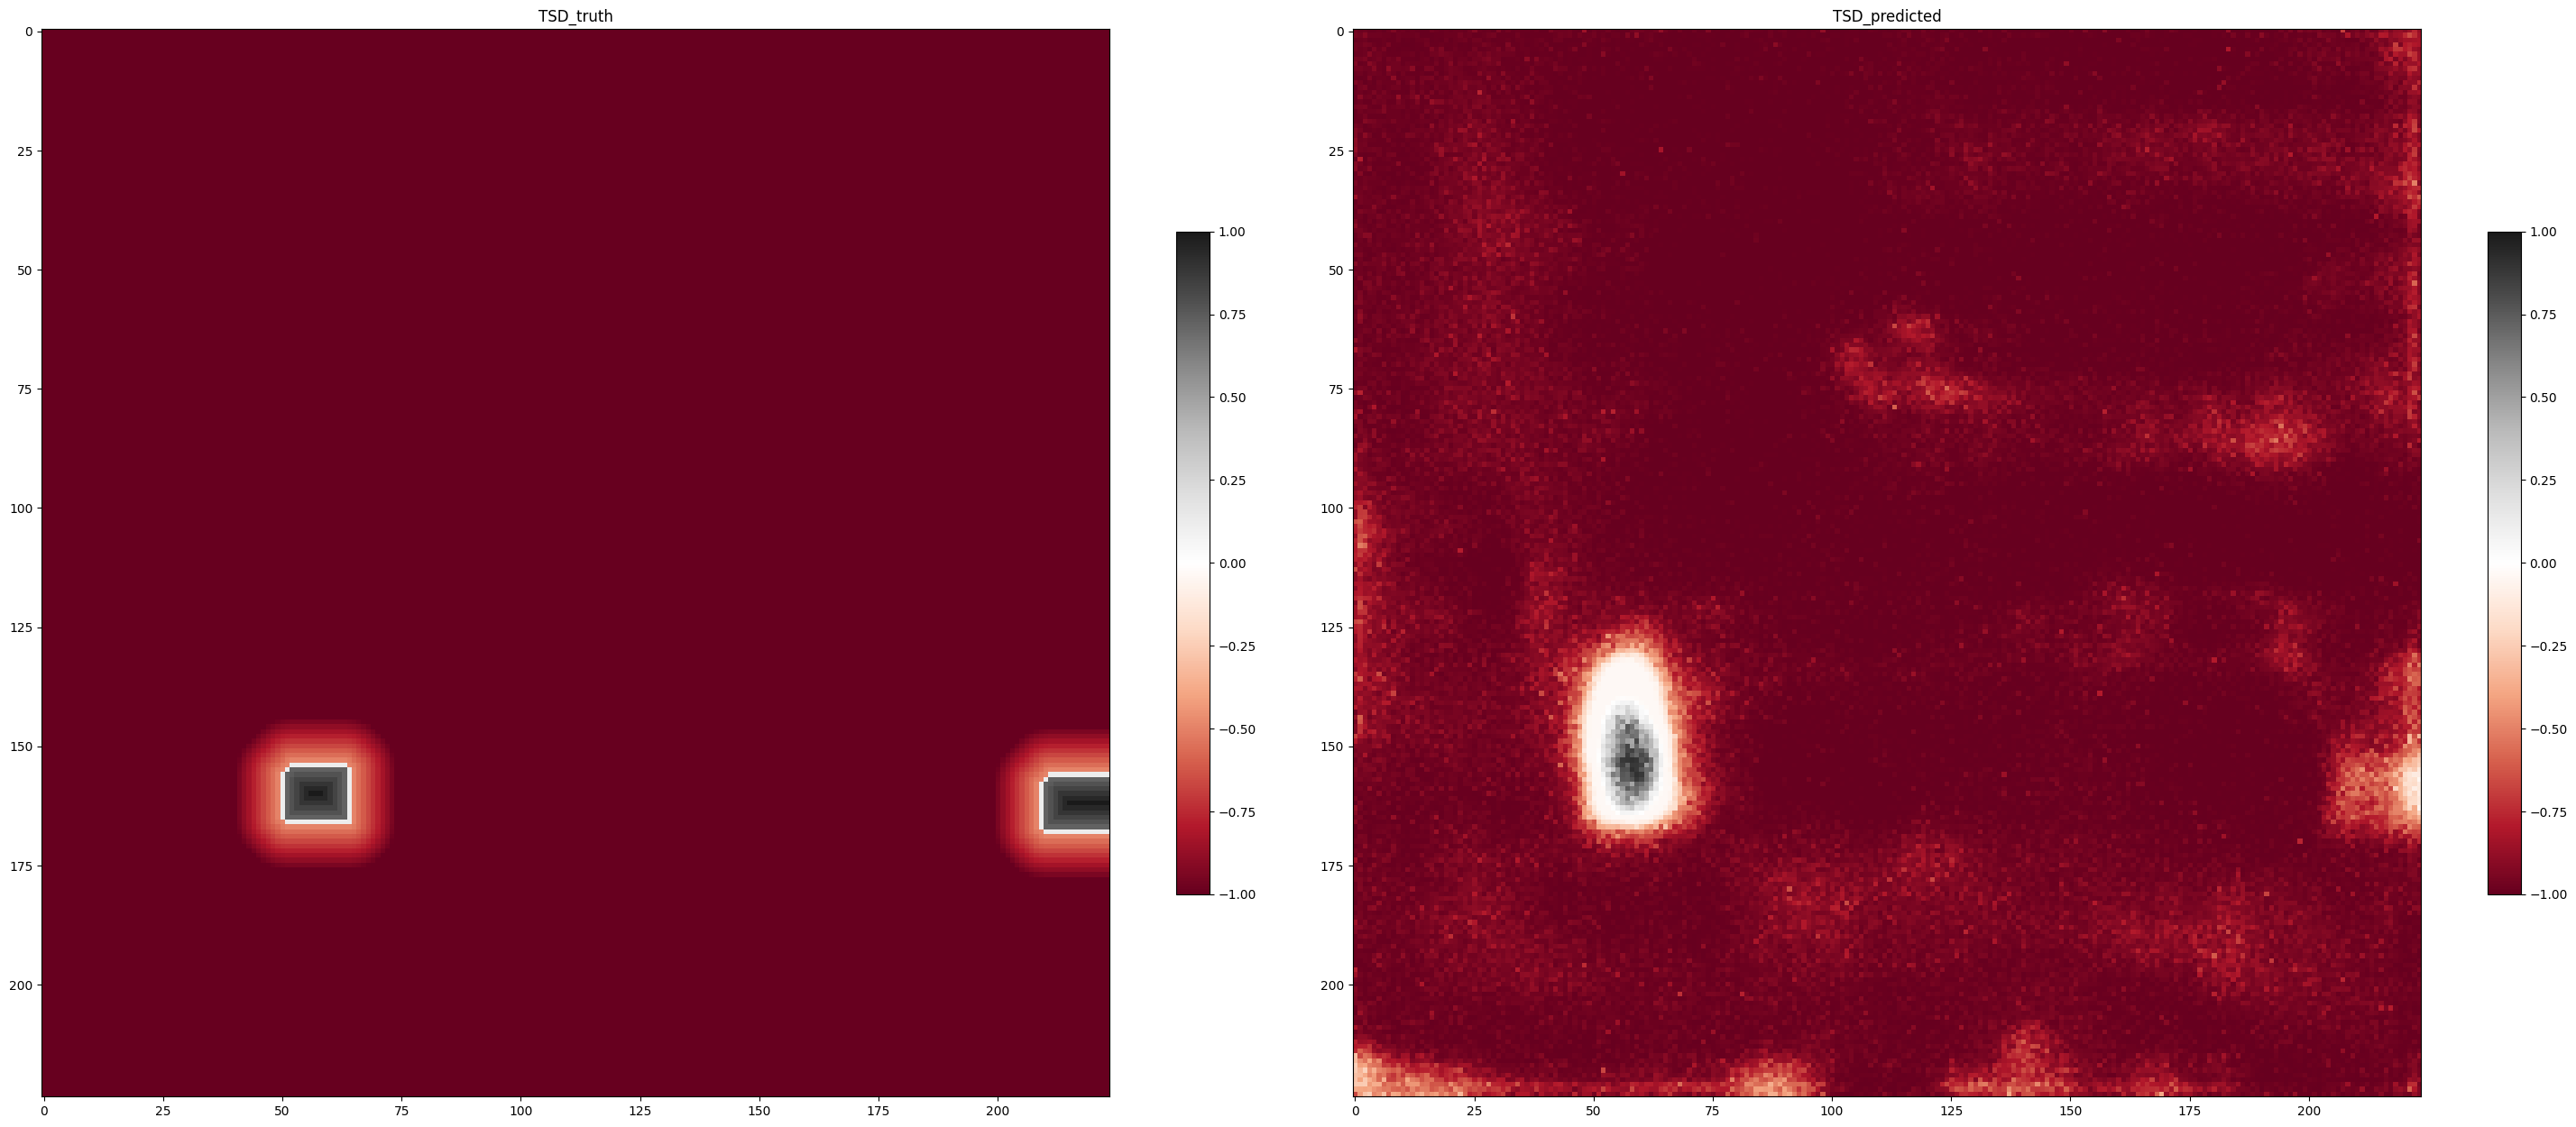

torch.Size([3, 3, 224, 224])


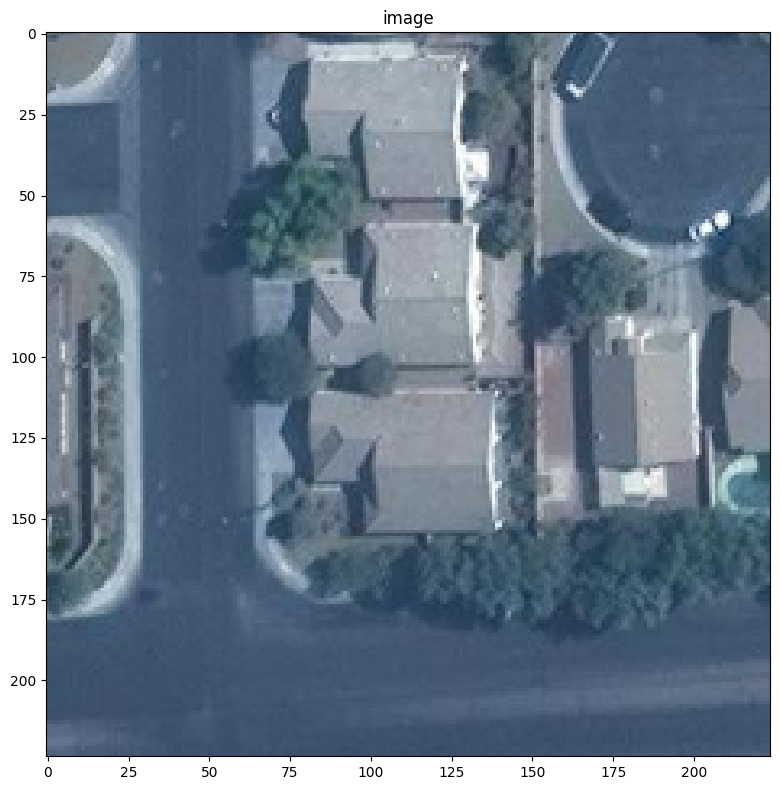

(224, 224)


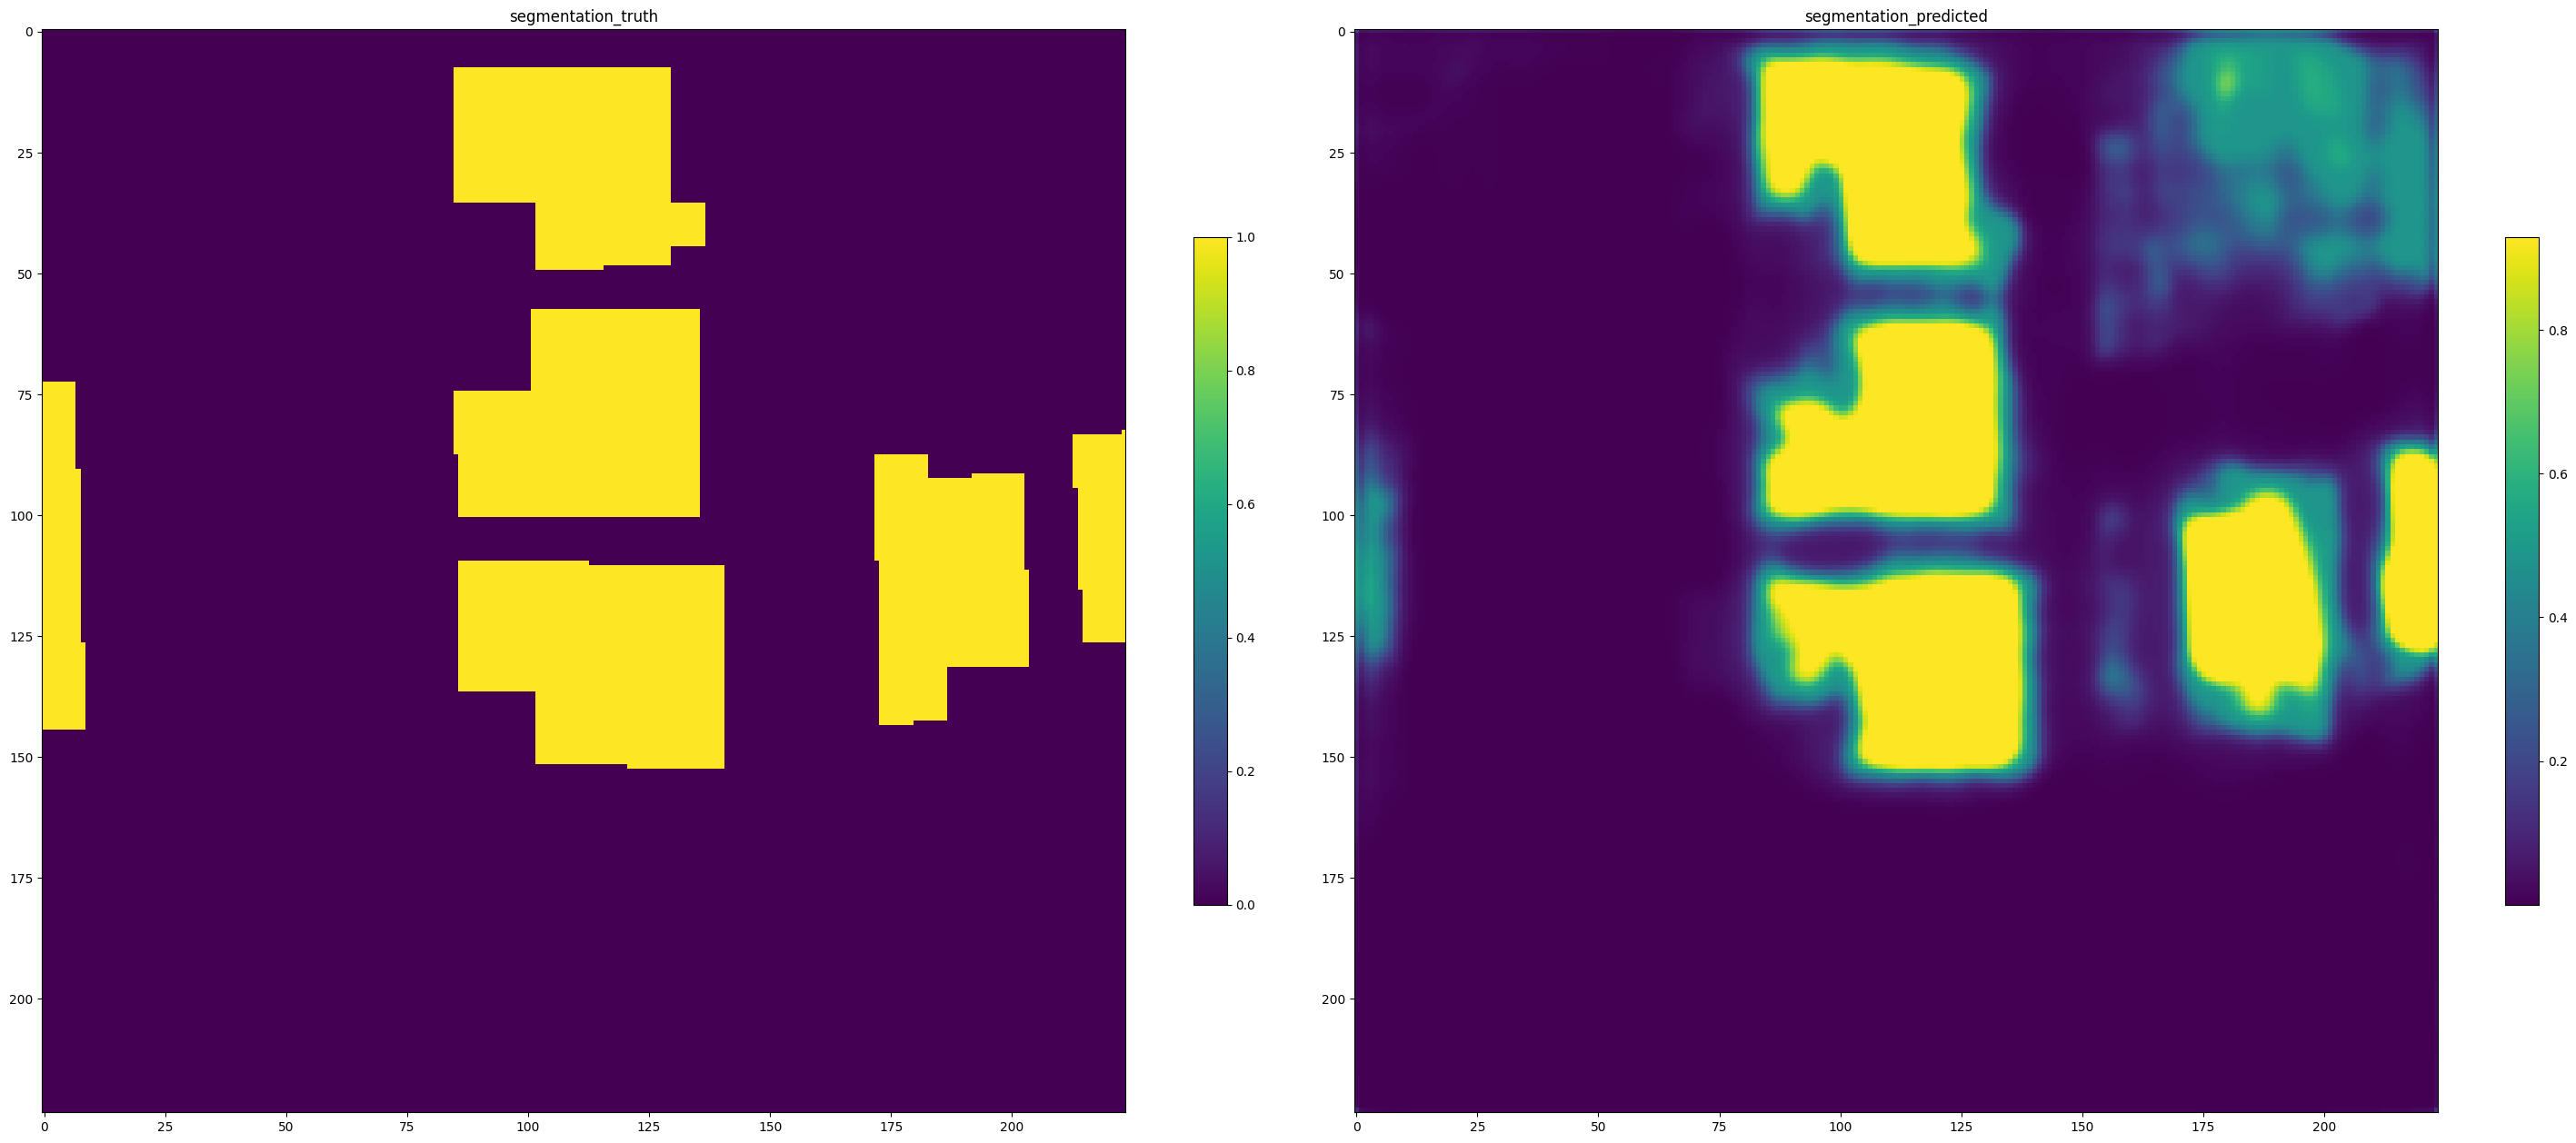

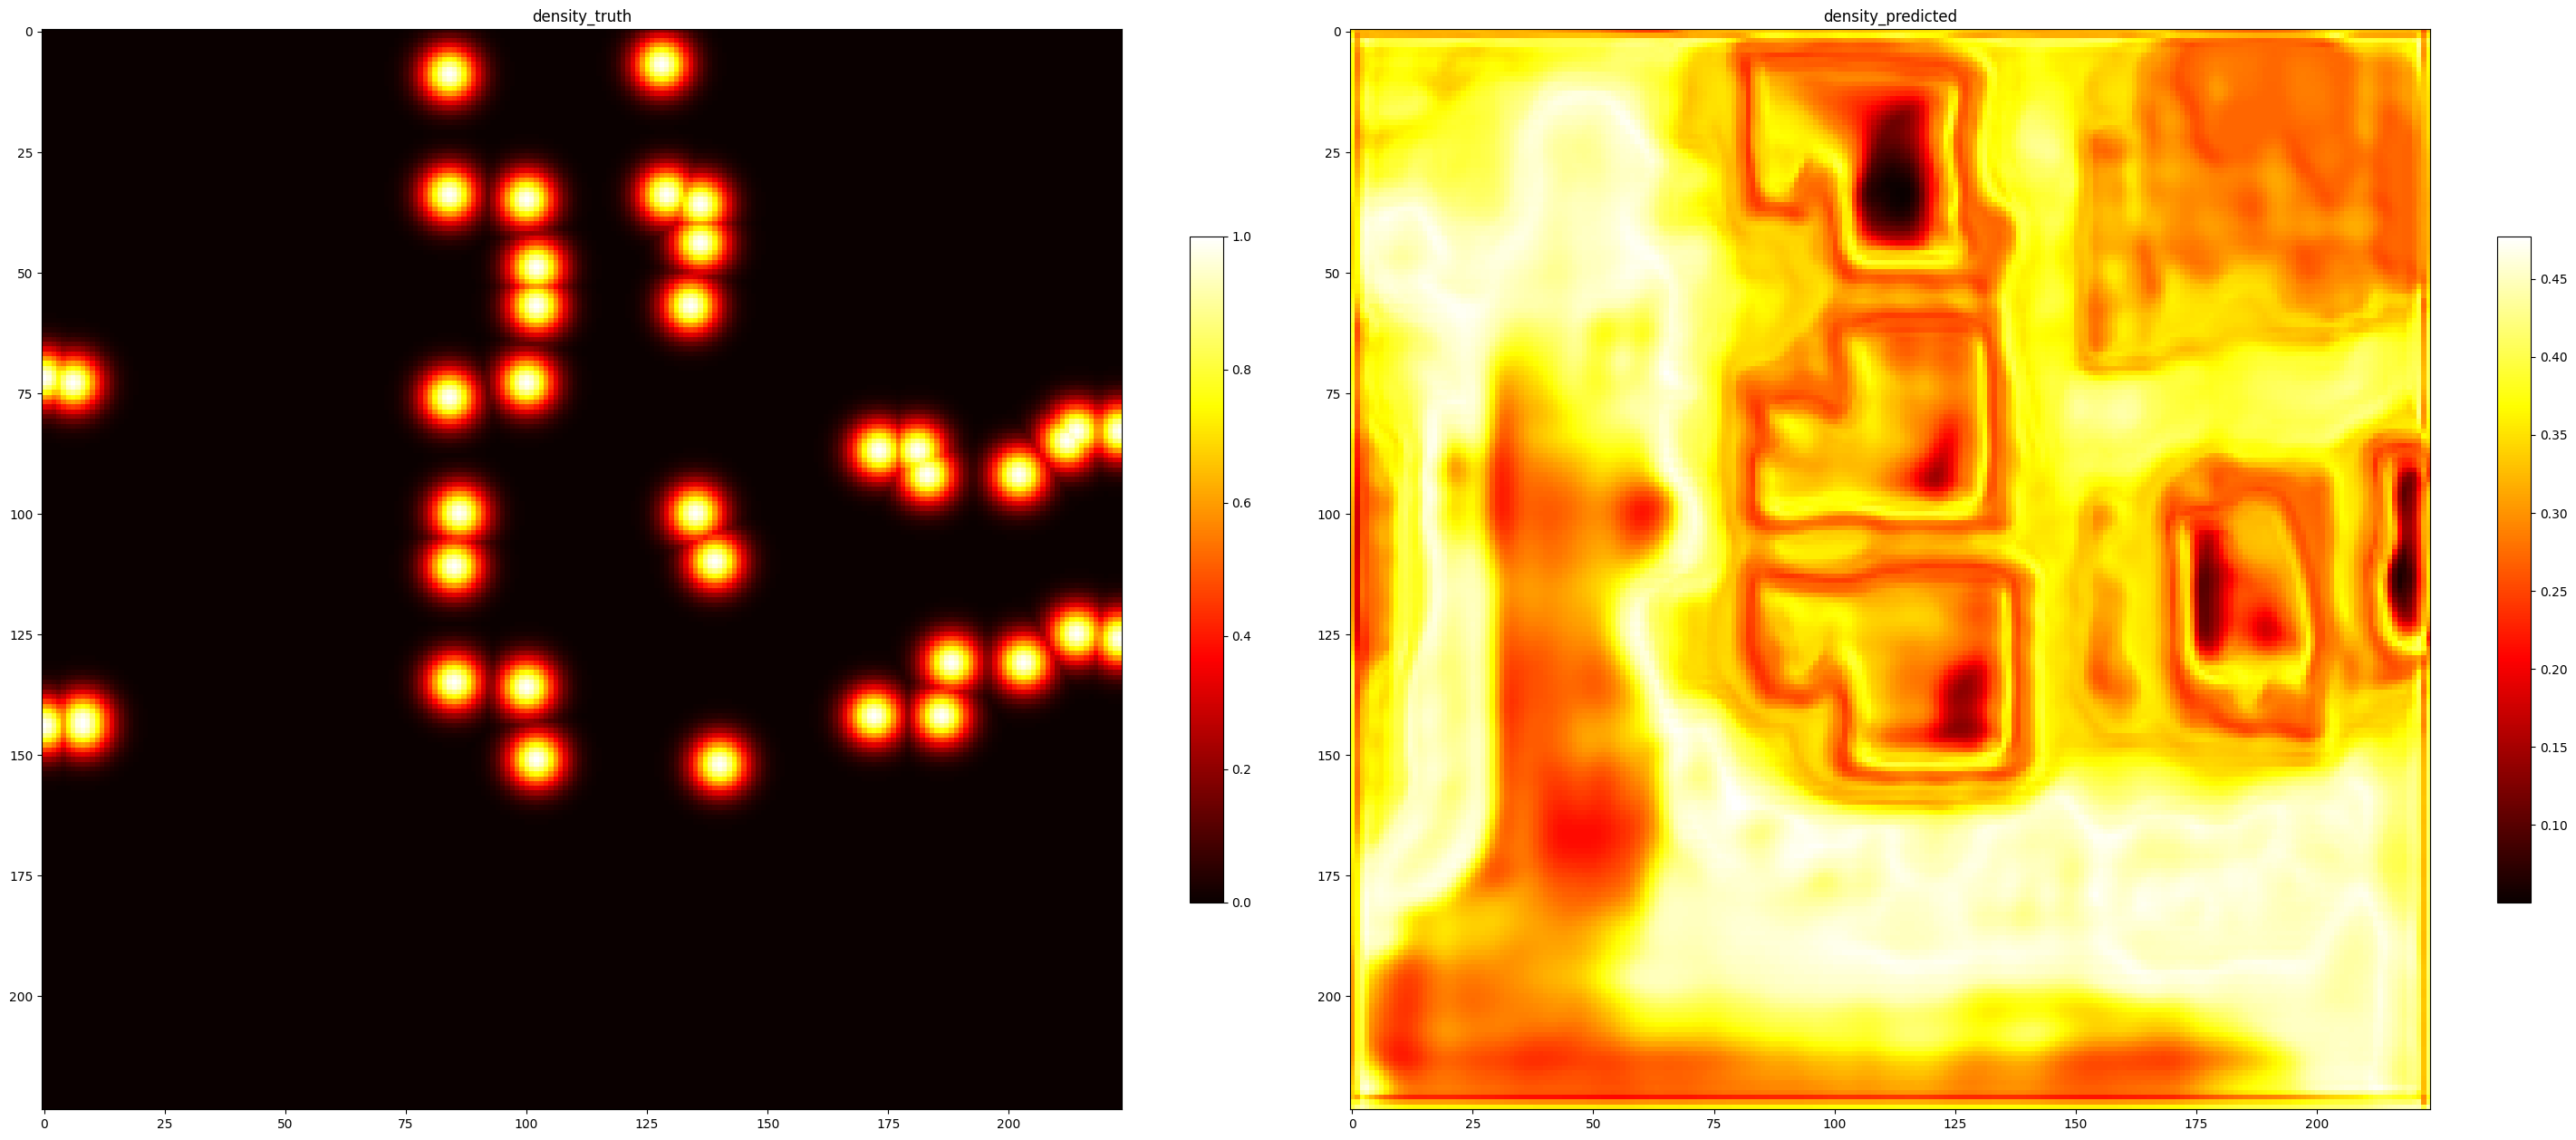

'\nplt.figure()\nplt.plot(np.arange(len(training_losses)), training_losses)\nplt.plot(np.arange(len(validation_losses)), validation_losses)\nax = plt.gca()\nax.set_ylim(1.5 , max(training_losses))\n\nplt.show()\n'

In [ ]:
print(inputs.size)
afficher_image(inputs)
affichage_segmentation(segmentation_truth = true_semantique_segmentation.to(torch.float32) , predicted_predicted = branche_2_output)

affichage_data_density(density_truth = gaussian_map , density_predicted = branch1_output)

affichage_tsd(tsd_truth = tsd_map , tsd_predicted = tsd_prediction)

"""
affichage_carte_carracteristique(model_features)
"""

afficher_image(inputs_1)
affichage_segmentation(segmentation_truth = true_semantique_segmentation_1.to(torch.float32) , predicted_predicted = pred_branche_2_output_val)
affichage_data_density(density_truth = gaussian_map_1 , density_predicted = pred_branch1_output_val)
affichage_tsd(tsd_truth = tsd_map_1 , tsd_predicted = pred_tsd_prediction_val)

'''
plt.figure()
plt.plot(np.arange(len(training_losses)), training_losses)
plt.plot(np.arange(len(validation_losses)), validation_losses)
ax = plt.gca()
ax.set_ylim(1.5 , max(training_losses))

plt.show()
'''

# Test


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)


Using device: cuda


In [ ]:
path_model = os.path.join(SAVE_MODELE_IN, 'train_t_10_sigma_4' + str(30) + 'epochs.pth')
print(path_model)
model.load_state_dict(torch.load(path_model))
print(model)
#for name, param in network.named_parameters():
    #print(f'Parameter name: {name}, Size: {param.size()}')

/content/drive/MyDrive/M2_VMI/systeme_de_vision/results/train_t_10_sigma_430epochs.pth
TSDPredictionModel(
  (unet_model): Unet(
    (encoder): ResNetEncoder(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNo

In [ ]:
def binarisation(segmentation_pred,seuil ):
  binarisation = np.zeros(np.shape(segmentation_pred),dtype= int)
  masque_inf = segmentation_pred < seuil
  masque_sup = segmentation_pred >= seuil
  binarisation[masque_sup] = 1
  return binarisation

In [ ]:
from torch.autograd import Variable
from tqdm.autonotebook import tqdm #progression bar

# Variables pour stocker les prédictions et les étiquettes de vérité terrain
predictions_tsd = []
predictions_segmentation = []
pred_seg_seuil = []
predictions_density = []
true__segmentation = []
model.to(device)
model.eval()
# Parcours des données de test et obtention des prédictions
with torch.no_grad():  # Désactive les gradients pour accélérer l'inférence
  for i, (inputs_test, tsd_map_test  , gaussian_map_test , true_semantique_segmentation_test) in enumerate(tqdm(test_loader)):
    #Convert the inputs and GTs to torch Variable (will hold the computation
    #graph) and send them to the computation device (i.e. GPU).
    inputs_test = Variable(inputs_test.float()).to(device)# image rgb
    true_semantique_segmentation_test = Variable(true_semantique_segmentation_test).type(torch.FloatTensor).to(device) # segmentation semantique verité terrain
    tsd_map_test = Variable(tsd_map_test).type(torch.FloatTensor).to(device) # tsd map verité terrin
    gaussian_map_test = Variable(gaussian_map_test).type(torch.FloatTensor).to(device) # gaussian map verité terrain

    # Passez les données de test à travers le modèle
    pred_tsd_prediction_test , pred_branch1_output_test , pred_branche_2_output_test  = model(inputs_test)


    # Stockez les prédictions et les étiquettes de vérité terrain
    predictions_tsd.extend(pred_tsd_prediction_test.cpu().numpy())
    predictions_density.extend(pred_branch1_output_test.cpu().numpy())
    predictions_segmentation.extend(pred_branche_2_output_test.cpu().numpy())

    binarised_seg = binarisation(pred_branche_2_output_test.cpu().numpy()[0], 0.7)

    pred_seg_seuil.append(binarised_seg)

    true__segmentation.append(true_semantique_segmentation_test.cpu().numpy()[0])
    #affichage_segmentation(segmentation_truth = true_semantique_segmentation_test.to(torch.float32) , predicted_predicted = pred_branche_2_output_test)



  0%|          | 0/149 [00:00<?, ?it/s]

In [ ]:
def le_f1(pred,true):
  list_f1 = []
  for i in range (len(pred)):
    mask_pred_flat = pred[i].flatten()
    mask_gt_flat = true[i].flatten()

    f1 = f1_score(mask_gt_flat, mask_pred_flat, average='binary')  # Si vous avez une segmentation binaire
    list_f1.append(f1)
  return sum(list_f1)/len(list_f1)

In [ ]:
from sklearn.metrics import f1_score
le_f1(pred_seg_seuil,true__segmentation)


0.7212318571573202

In [ ]:
pred_seg_seuil

[array([[[0, 0, 0, ..., 1, 1, 1],
         [0, 0, 0, ..., 1, 1, 1],
         [0, 0, 0, ..., 1, 1, 1],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]]),
 array([[[1, 0, 1, ..., 0, 0, 1],
         [0, 0, 0, ..., 0, 0, 0],
         [1, 0, 1, ..., 0, 0, 0],
         ...,
         [1, 1, 1, ..., 0, 0, 0],
         [1, 1, 1, ..., 0, 0, 0],
         [1, 1, 1, ..., 0, 0, 0]]]),
 array([[[1, 0, 1, ..., 1, 1, 1],
         [0, 0, 0, ..., 0, 0, 0],
         [1, 0, 1, ..., 1, 0, 1],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]]),
 array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]]),
 array([[[0, 0, 0, ..., 1, 1, 1],
         [0, 0, 0, ..., 1, 1, 1],
         [0, 0, 0, ..., 1, 1, 1],
         ...,


# Construction du polygone final à partir du polygone predit et de la density map

In [ ]:
#nom_image_test = ['000000084061.npy', '000000068941.npy', '000000105411.npy', '000000042472.npy', '000000141261.npy', '000000028754.npy', '000000106894.npy', '000000080216.npy', '000000089034.npy', '000000163950.npy', '000000131563.npy', '000000095122.npy', '000000249958.npy', '000000082526.npy', '000000256902.npy', '000000033628.npy', '000000215295.npy', '000000030024.npy', '000000004164.npy', '000000143485.npy', '000000021057.npy', '000000273951.npy', '000000214312.npy', '000000213054.npy', '000000226892.npy', '000000267204.npy', '000000229590.npy', '000000092150.npy', '000000235811.npy', '000000011220.npy', '000000136533.npy', '000000206320.npy', '000000125949.npy', '000000105216.npy', '000000009449.npy', '000000072374.npy', '000000081648.npy', '000000106481.npy', '000000025500.npy', '000000182651.npy', '000000023502.npy', '000000045197.npy', '000000030493.npy', '000000100150.npy', '000000214699.npy', '000000044525.npy', '000000063033.npy', '000000206597.npy', '000000049116.npy', '000000243326.npy', '000000118009.npy', '000000002522.npy', '000000099843.npy', '000000263848.npy', '000000037717.npy', '000000245560.npy', '000000277129.npy', '000000194496.npy', '000000235501.npy', '000000165680.npy', '000000018059.npy', '000000157475.npy', '000000067237.npy', '000000142092.npy', '000000165361.npy', '000000082575.npy', '000000037304.npy', '000000011386.npy', '000000151341.npy', '000000245878.npy', '000000061601.npy', '000000102022.npy', '000000159875.npy', '000000207584.npy', '000000184586.npy', '000000036716.npy', '000000099357.npy', '000000010349.npy', '000000066884.npy', '000000106108.npy', '000000273819.npy', '000000231742.npy', '000000084918.npy', '000000246490.npy', '000000066360.npy', '000000170176.npy', '000000071089.npy', '000000147993.npy', '000000222774.npy', '000000121415.npy', '000000247105.npy', '000000198970.npy', '000000274886.npy', '000000156056.npy', '000000006985.npy', '000000208144.npy', '000000275546.npy', '000000158338.npy', '000000039776.npy', '000000122775.npy', '000000079526.npy', '000000151152.npy', '000000252598.npy', '000000058976.npy', '000000172129.npy', '000000227750.npy', '000000139090.npy', '000000096301.npy', '000000139350.npy', '000000027259.npy', '000000187272.npy', '000000076921.npy', '000000027454.npy', '000000246792.npy', '000000242934.npy', '000000081869.npy', '000000016223.npy', '000000254069.npy', '000000067580.npy', '000000060648.npy', '000000035699.npy', '000000104917.npy', '000000090074.npy', '000000239754.npy', '000000238928.npy', '000000172895.npy', '000000146276.npy', '000000155849.npy', '000000210077.npy', '000000250147.npy', '000000174970.npy', '000000024989.npy', '000000185492.npy', '000000093024.npy', '000000274370.npy', '000000016121.npy', '000000253326.npy', '000000256928.npy', '000000097633.npy', '000000120884.npy', '000000263300.npy', '000000197287.npy', '000000049138.npy', '000000078306.npy', '000000054129.npy', '000000208777.npy', '000000143498.npy', '000000214213.npy', '000000150707.npy']
print(nom_image_test)

['000000084061.npy', '000000068941.npy', '000000105411.npy', '000000042472.npy', '000000141261.npy', '000000028754.npy', '000000106894.npy', '000000080216.npy', '000000089034.npy', '000000163950.npy', '000000131563.npy', '000000095122.npy', '000000249958.npy', '000000082526.npy', '000000256902.npy', '000000033628.npy', '000000215295.npy', '000000030024.npy', '000000004164.npy', '000000143485.npy', '000000021057.npy', '000000273951.npy', '000000214312.npy', '000000213054.npy', '000000226892.npy', '000000267204.npy', '000000229590.npy', '000000092150.npy', '000000235811.npy', '000000011220.npy', '000000136533.npy', '000000206320.npy', '000000125949.npy', '000000105216.npy', '000000009449.npy', '000000072374.npy', '000000081648.npy', '000000106481.npy', '000000025500.npy', '000000182651.npy', '000000023502.npy', '000000045197.npy', '000000030493.npy', '000000100150.npy', '000000214699.npy', '000000044525.npy', '000000063033.npy', '000000206597.npy', '000000049116.npy', '000000243326.npy',

In [ ]:
def find_vertex(segmentation,epsilon_):

  #edges = cv2.Canny(mask_image, threshold1=50, threshold2=150)

  contours, _ = cv2.findContours(segmentation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  vertex = [cv2.approxPolyDP(contour, epsilon=epsilon_, closed=True) for contour in contours]


  return vertex

In [ ]:
def masque_segmentation(segmentation_pred,seuil):
  binarisation = np.zeros(np.shape(segmentation_pred),dtype= int)

  masque_inf = segmentation_pred < seuil
  masque_sup = segmentation_pred >= seuil
  binarisation[masque_sup] = 1

  if binarisation.dtype != np.uint8:
    binarisation = binarisation.astype(np.uint8)

  return binarisation

In [ ]:
def vertex_extraction(masque):
  vertex = find_vertex(masque,3)
  return vertex

In [ ]:

def adjust_vertex_with_gaussian_density(vertex, gaussian_density_predict, radius, threshold):
    # Copier la matrice gaussian_density_predict
    masked_density = np.zeros(np.shape(gaussian_density_predict))

    # Définir les indices pour la région d'intérêt
    x_min = max(vertex[0] - radius, 0)
    x_max = min(vertex[0] + radius, gaussian_density_predict.shape[0])
    y_min = max(vertex[1] - radius, 0)
    y_max = min(vertex[1] + radius, gaussian_density_predict.shape[1])

    # Mettre à 0 toutes les valeurs hors de la région d'intérêt
    #masked_density[:, :] = 0
    masked_density[x_min:x_max, y_min:y_max] = gaussian_density_predict[x_min:x_max, y_min:y_max]

    # Trouver la position de la réponse gaussienne maximale dans la région masquée
    max_response = np.max(masked_density)

    if max_response > threshold:
      #max_positions = (masked_density == max_response)
      #max_indices = torch.nonzero(masked_density, as_tuple=False)

      indice_max = np.argmax(masked_density)
      max_indices = np.unravel_index(indice_max, masked_density.shape)

      return list(max_indices)


In [ ]:
def generate_final_polygon(segmentation_pred, gaussian_density_pred,seuil_binarisation_segmentation , radius, threshold):

    segmentation_binarise = masque_segmentation(segmentation_pred,seuil_binarisation_segmentation)

    list_vertex = vertex_extraction(segmentation_binarise )
    list_adjusted_polygon = []
    for poly in list_vertex:
      poly = poly.squeeze()
      if len(np.shape(poly)) == 2:

        vertex_polygone = []
        for vertex in poly:
          adjusted_vertex = adjust_vertex_with_gaussian_density((vertex[0],vertex[1]), gaussian_density_pred, radius, threshold)
          if adjusted_vertex != None:
            vertex_polygone.append(adjusted_vertex)
        if vertex_polygone:
          adjusted_polygon = np.array(vertex_polygone)
          list_adjusted_polygon.append(adjusted_polygon)

    return list_adjusted_polygon


In [ ]:
list_polygone_pred_polygone_voisinage_10_seuil_0_7 = []
list_polygone_pred_polygone_voisinage_15_seuil_0_7 = []
list_polygone_pred_polygone_voisinage_1_seuil_0_7 = []
list_polygone_pred_polygone_voisinage_5_seuil_0_7 = []
list_polygone_pred_polygone_voisinage_10_seuil_0_5 = []
list_polygone_pred_polygone_voisinage_10_seuil_0_9 = []

In [ ]:
# for sur le dataloader test
#for num in range(len(predictions_segmentation))[0:1]:


from tqdm.autonotebook import tqdm #progression bar

for num,(segm) in enumerate(tqdm(predictions_segmentation)):
  build_poly1 = np.zeros((224,224))
  build_poly2 = np.zeros((224,224))
  build_poly3 = np.zeros((224,224))
  build_poly4 = np.zeros((224,224))
  build_poly5 = np.zeros((224,224))
  build_poly6 = np.zeros((224,224))

  predictions_segmentation_reshape = predictions_segmentation[num].reshape(224, 224)
  predictions_density_reshape = predictions_density[num].reshape(224, 224)

  new_polygone1 = generate_final_polygon(segmentation_pred = predictions_segmentation_reshape,
                                        gaussian_density_pred = predictions_density_reshape,
                                        seuil_binarisation_segmentation = 0.7,
                                        radius = 1,
                                        threshold = 0.7)
  new_polygone2 = generate_final_polygon(segmentation_pred = predictions_segmentation_reshape,
                                        gaussian_density_pred = predictions_density_reshape,
                                        seuil_binarisation_segmentation = 0.7,
                                        radius = 5,
                                        threshold = 0.7)

  new_polygone3 = generate_final_polygon(segmentation_pred = predictions_segmentation_reshape,
                                        gaussian_density_pred = predictions_density_reshape,
                                        seuil_binarisation_segmentation = 0.7,
                                        radius = 10,
                                        threshold = 0.7)

  new_polygone4 = generate_final_polygon(segmentation_pred = predictions_segmentation_reshape,
                                        gaussian_density_pred = predictions_density_reshape,
                                        seuil_binarisation_segmentation = 0.7,
                                        radius = 15,
                                        threshold = 0.7)

  new_polygone5 = generate_final_polygon(segmentation_pred = predictions_segmentation_reshape,
                                        gaussian_density_pred = predictions_density_reshape,
                                        seuil_binarisation_segmentation = 0.7,
                                        radius = 10,
                                        threshold = 0.5)

  new_polygone6 = generate_final_polygon(segmentation_pred = predictions_segmentation_reshape,
                                        gaussian_density_pred = predictions_density_reshape,
                                        seuil_binarisation_segmentation = 0.7,
                                        radius = 10,
                                        threshold = 0.9)



  cv2.polylines(build_poly1, new_polygone1, True, (225, 0, 0), 2)
  cv2.polylines(build_poly2, new_polygone2, True, (225, 0, 0), 2)
  cv2.polylines(build_poly3, new_polygone3, True, (225, 0, 0), 2)
  cv2.polylines(build_poly4, new_polygone4, True, (225, 0, 0), 2)
  cv2.polylines(build_poly5, new_polygone5, True, (225, 0, 0), 2)
  cv2.polylines(build_poly6, new_polygone6, True, (225, 0, 0), 2)

  list_polygone_pred_polygone_voisinage_1_seuil_0_7.append(build_poly1)
  list_polygone_pred_polygone_voisinage_5_seuil_0_7.append(build_poly2)
  list_polygone_pred_polygone_voisinage_10_seuil_0_7.append(build_poly3)
  list_polygone_pred_polygone_voisinage_15_seuil_0_7.append(build_poly4)
  list_polygone_pred_polygone_voisinage_10_seuil_0_5.append(build_poly5)
  list_polygone_pred_polygone_voisinage_10_seuil_0_9.append(build_poly6)



  #np.save(os.path.join('/content/drive/MyDrive/M2_VMI/systeme_de_vision/results/res1/1_1_1/voisinage/polygone_voisinage_5_seuil_0_7', nom_image_test[num].split(".")[0] + '.npy'), build_poly)





  0%|          | 0/149 [00:00<?, ?it/s]

#Polygones issus de la vérité terrain

In [ ]:
from pycocotools.coco import COCO

def annotation(liste_nom_image): # renvoie pour chaque image def par son nom: ( son id , la segmentation de ts les batiment presente dans le fichier coco
  dico = {}
  coco = COCO(TRAIN_ANNOTATIONS_SMALL_PATH)

  # Obtenir les informations de toutes les images dans le fichier d'annotations
  all_images_info = coco.loadImgs(coco.getImgIds())


  dico_nom_id = {img['file_name']: img['id'] for img in all_images_info}

  # Trouver les ID correspondants
  image_ids = [dico_nom_id[nom_image] for nom_image in liste_nom_image if nom_image in dico_nom_id]


  #image_ids = [coco.search_images(name=nom_image)[0]['id'] for nom_image in liste_nom_image ]

  list_vertex = []

  for i in range(len(image_ids)) :
    annotation_ids = coco.getAnnIds(imgIds= image_ids[i])
    annotations = coco.loadAnns(annotation_ids)
    l = []
    for e in annotations:
      transformed_list = [[e["segmentation"][0][h], e["segmentation"][0][h + 1]] for h in range(0, len(e["segmentation"][0]), 2)]

      l.append(transformed_list)
    list_vertex.append(l)

  return list_vertex

In [ ]:
def true_vertex(vertice_cooordonnees,dim_image):
  list_poly= []
  matrice = np.zeros(dim_image)

  for e in vertice_cooordonnees:
    mv = np.array(e,dtype=int)
    list_poly.append(mv-1)
  #print(list_poly)
  for el in list_poly:
    #print(type(el))
    matrice[el[:, 0], el[:, 1]] = 1

  return list_poly

In [ ]:
def construction_poly(list_vertex):
  matrice_poly = np.zeros((300,300), dtype=np.uint8)

  # Dessiner tous les polygones sur poly_true et poly_test
  cv2.polylines(matrice_poly,list_vertex , True, (255, 0, 0), 2)
  return matrice_poly

In [ ]:
def resize(matrice):
  matrice_copy = np.copy(matrice)
  resized_matrice_vertice = cv2.resize(matrice_copy  , dsize=(224,224), interpolation=cv2.INTER_NEAREST) #  INTER_LINEAR
  return resized_matrice_vertice

In [ ]:
#nom_images_test = ['000000168159.jpg', '000000082522.jpg', '000000068941.jpg', '000000192943.jpg', '000000117245.jpg', '000000216331.jpg', '000000083774.jpg', '000000028754.jpg', '000000058700.jpg', '000000148141.jpg', '000000008296.jpg', '000000176349.jpg', '000000249958.jpg', '000000135499.jpg', '000000182957.jpg', '000000177599.jpg', '000000065476.jpg', '000000021057.jpg', '000000278363.jpg', '000000052683.jpg', '000000098611.jpg', '000000084344.jpg', '000000213054.jpg', '000000080548.jpg', '000000267204.jpg', '000000248631.jpg', '000000257575.jpg', '000000244184.jpg', '000000059354.jpg', '000000057603.jpg', '000000035236.jpg', '000000043680.jpg', '000000136533.jpg', '000000206320.jpg', '000000266324.jpg', '000000082535.jpg', '000000145067.jpg', '000000025500.jpg', '000000229947.jpg', '000000095985.jpg', '000000057164.jpg', '000000033523.jpg', '000000247822.jpg', '000000212179.jpg', '000000005398.jpg', '000000141804.jpg', '000000215355.jpg', '000000061803.jpg', '000000145774.jpg', '000000133411.jpg', '000000016291.jpg', '000000134144.jpg', '000000190145.jpg', '000000194980.jpg', '000000243326.jpg', '000000234312.jpg', '000000277129.jpg', '000000183010.jpg', '000000063361.jpg', '000000165128.jpg', '000000065080.jpg', '000000250380.jpg', '000000065869.jpg', '000000108286.jpg', '000000102022.jpg', '000000006157.jpg', '000000036716.jpg', '000000066884.jpg', '000000192766.jpg', '000000106108.jpg', '000000018578.jpg', '000000184385.jpg', '000000123835.jpg', '000000183838.jpg', '000000246490.jpg', '000000228609.jpg', '000000215281.jpg', '000000135046.jpg', '000000269959.jpg', '000000098706.jpg', '000000169960.jpg', '000000024994.jpg', '000000159093.jpg', '000000059412.jpg', '000000066986.jpg', '000000266744.jpg', '000000253306.jpg', '000000069899.jpg', '000000158338.jpg', '000000163269.jpg', '000000122775.jpg', '000000112909.jpg', '000000121046.jpg', '000000227750.jpg', '000000126911.jpg', '000000139090.jpg', '000000077147.jpg', '000000198419.jpg', '000000027259.jpg', '000000120180.jpg', '000000058879.jpg', '000000046460.jpg', '000000229568.jpg', '000000154022.jpg', '000000038252.jpg', '000000070501.jpg', '000000087627.jpg', '000000121918.jpg', '000000144024.jpg', '000000125008.jpg', '000000251847.jpg', '000000189974.jpg', '000000076653.jpg', '000000015851.jpg', '000000152363.jpg', '000000013309.jpg', '000000246655.jpg', '000000036694.jpg', '000000021071.jpg', '000000031477.jpg', '000000229573.jpg', '000000223591.jpg', '000000253326.jpg', '000000274066.jpg', '000000118593.jpg', '000000162183.jpg', '000000180545.jpg', '000000129329.jpg', '000000078306.jpg', '000000011828.jpg', '000000096137.jpg', '000000055672.jpg', '000000006865.jpg', '000000225897.jpg', '000000004302.jpg', '000000071738.jpg', '000000218543.jpg', '000000150707.jpg', '000000174881.jpg', '000000244143.jpg', '000000213786.jpg', '000000120271.jpg', '000000262479.jpg', '000000089675.jpg', '000000231498.jpg', '000000124594.jpg', '000000103088.jpg', '000000171610.jpg', '000000105907.jpg']


In [ ]:
nom_images = chargement_txt_file(nom_fi = TRAIN_NOM_IMAGES)

images_test  = [a.replace(".npy", ".jpg") for a in nom_image_test]

['000000211570.jpg', '000000213100.jpg', '000000151221.jpg', '000000127630.jpg', '000000131865.jpg', '000000014602.jpg', '000000177867.jpg', '000000148678.jpg', '000000129579.jpg', '000000041441.jpg', '000000082522.jpg', '000000068941.jpg', '000000151878.jpg', '000000048111.jpg', '000000216331.jpg', '000000039138.jpg', '000000141261.jpg', '000000083774.jpg', '000000143013.jpg', '000000184224.jpg', '000000055432.jpg', '000000042553.jpg', '000000224578.jpg', '000000072994.jpg', '000000214583.jpg', '000000058700.jpg', '000000167063.jpg', '000000163950.jpg', '000000005370.jpg', '000000148141.jpg', '000000183093.jpg', '000000124965.jpg', '000000008296.jpg', '000000121238.jpg', '000000017313.jpg', '000000139460.jpg', '000000017452.jpg', '000000176349.jpg', '000000249958.jpg', '000000182957.jpg', '000000135499.jpg', '000000177599.jpg', '000000201901.jpg', '000000020409.jpg', '000000256902.jpg', '000000033628.jpg', '000000169342.jpg', '000000111256.jpg', '000000056343.jpg', '000000030024.jpg',

In [ ]:
liste_vertex_true = annotation(images_test)

loading annotations into memory...
Done (t=1.86s)
creating index...
index created!


In [ ]:
liste_polygone_true = []
for vi in range(len(liste_vertex_true)):
  list_vertex = true_vertex(liste_vertex_true[vi],(300,300))
  polygone = construction_poly(list_vertex)
  resize_poly = resize(polygone)
  liste_polygone_true.append(resize_poly)

In [ ]:
print(liste_polygone_true)

[array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ...,   0,   0, 255],
       [  0,   0,   0, ...,   0,   0, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8), array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ...,   0,   0, 255],
       [  0,   0,   0, ...,   0,   0, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0

# Chargement des polygones prédits

In [ ]:
#nom_images_test = ['000000168159.jpg', '000000082522.jpg', '000000068941.jpg', '000000192943.jpg', '000000117245.jpg', '000000216331.jpg', '000000083774.jpg', '000000028754.jpg', '000000058700.jpg', '000000148141.jpg', '000000008296.jpg', '000000176349.jpg', '000000249958.jpg', '000000135499.jpg', '000000182957.jpg', '000000177599.jpg', '000000065476.jpg', '000000021057.jpg', '000000278363.jpg', '000000052683.jpg', '000000098611.jpg', '000000084344.jpg', '000000213054.jpg', '000000080548.jpg', '000000267204.jpg', '000000248631.jpg', '000000257575.jpg', '000000244184.jpg', '000000059354.jpg', '000000057603.jpg', '000000035236.jpg', '000000043680.jpg', '000000136533.jpg', '000000206320.jpg', '000000266324.jpg', '000000082535.jpg', '000000145067.jpg', '000000025500.jpg', '000000229947.jpg', '000000095985.jpg', '000000057164.jpg', '000000033523.jpg', '000000247822.jpg', '000000212179.jpg', '000000005398.jpg', '000000141804.jpg', '000000215355.jpg', '000000061803.jpg', '000000145774.jpg', '000000133411.jpg', '000000016291.jpg', '000000134144.jpg', '000000190145.jpg', '000000194980.jpg', '000000243326.jpg', '000000234312.jpg', '000000277129.jpg', '000000183010.jpg', '000000063361.jpg', '000000165128.jpg', '000000065080.jpg', '000000250380.jpg', '000000065869.jpg', '000000108286.jpg', '000000102022.jpg', '000000006157.jpg', '000000036716.jpg', '000000066884.jpg', '000000192766.jpg', '000000106108.jpg', '000000018578.jpg', '000000184385.jpg', '000000123835.jpg', '000000183838.jpg', '000000246490.jpg', '000000228609.jpg', '000000215281.jpg', '000000135046.jpg', '000000269959.jpg', '000000098706.jpg', '000000169960.jpg', '000000024994.jpg', '000000159093.jpg', '000000059412.jpg', '000000066986.jpg', '000000266744.jpg', '000000253306.jpg', '000000069899.jpg', '000000158338.jpg', '000000163269.jpg', '000000122775.jpg', '000000112909.jpg', '000000121046.jpg', '000000227750.jpg', '000000126911.jpg', '000000139090.jpg', '000000077147.jpg', '000000198419.jpg', '000000027259.jpg', '000000120180.jpg', '000000058879.jpg', '000000046460.jpg', '000000229568.jpg', '000000154022.jpg', '000000038252.jpg', '000000070501.jpg', '000000087627.jpg', '000000121918.jpg', '000000144024.jpg', '000000125008.jpg', '000000251847.jpg', '000000189974.jpg', '000000076653.jpg', '000000015851.jpg', '000000152363.jpg', '000000013309.jpg', '000000246655.jpg', '000000036694.jpg', '000000021071.jpg', '000000031477.jpg', '000000229573.jpg', '000000223591.jpg', '000000253326.jpg', '000000274066.jpg', '000000118593.jpg', '000000162183.jpg', '000000180545.jpg', '000000129329.jpg', '000000078306.jpg', '000000011828.jpg', '000000096137.jpg', '000000055672.jpg', '000000006865.jpg', '000000225897.jpg', '000000004302.jpg', '000000071738.jpg', '000000218543.jpg', '000000150707.jpg', '000000174881.jpg', '000000244143.jpg', '000000213786.jpg', '000000120271.jpg', '000000262479.jpg', '000000089675.jpg', '000000231498.jpg', '000000124594.jpg', '000000103088.jpg', '000000171610.jpg', '000000105907.jpg']


In [ ]:
list_polygone_predit = []
for nom_test in images_test:
  polygone_pred  = np.load(os.path.join("/content/drive/MyDrive/M2_VMI/systeme_de_vision/results/res1/1_1_1/voisinage/polygone_voisinage_1_seuil_0_7",
                          nom_test.split(".")[0] + '.npy'))
  list_polygone_predit.append(polygone_pred)



In [ ]:
print(np.max(list_polygone_predit[0]))

225.0


In [ ]:
'''list_polygone_pred_polygone_voisinage_10_seuil_0_7
list_polygone_pred_polygone_voisinage_15_seuil_0_7
list_polygone_pred_polygone_voisinage_1_seuil_0_7
list_polygone_pred_polygone_voisinage_5_seuil_0_7
list_polygone_pred_polygone_voisinage_10_seuil_0_5
list_polygone_pred_polygone_voisinage_10_seuil_0_9 '''

# Evaluation

In [ ]:

def maque_polygone(polygone):


  polygone1 = np.copy(polygone)
  polygone1[polygone == 255] = 1
  polygone1 = polygone1.astype(np.uint8)

  # Trouver les contours des polygones
  contours, _ = cv2.findContours(polygone1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Préparer un masque vide de la même taille que l'image des contours
  masque_polygone = np.zeros_like(polygone1)

  # Remplir les contours pour créer le masque
  polygone_plein = cv2.fillPoly(masque_polygone, contours, 255)

  '''
  fig, axs = plt.subplots(1, 1, figsize=(5, 5))
  axs.imshow(masque_polygone, cmap='Blues')
  axs.set_title('poly_plein')
  '''
  plt.show()

  return polygone_plein


In [ ]:
def iou(y_true, y_pred, smooth=1e-6):
  list_score_iou = []
  for i in range(len(y_true)):
      masque_y_true = maque_polygone(y_true[i])
      masque_y_pred = maque_polygone(y_pred[i])
      intersection = np.logical_and(masque_y_true, masque_y_pred)
      union = np.logical_or(masque_y_true, masque_y_pred)
      iou_score = np.sum(intersection) / (np.sum(union) + smooth)
      list_score_iou.append(iou_score)

  res_iou = sum(list_score_iou)/len(list_score_iou)
  #print(max(list_score_iou))
  return res_iou


In [ ]:
print(len(list_polygone_pred_polygone_voisinage_10_seuil_0_7 ))
print(len(list_polygone_pred_polygone_voisinage_15_seuil_0_7 ))
print(len(list_polygone_pred_polygone_voisinage_1_seuil_0_7 ))
print(len(list_polygone_pred_polygone_voisinage_5_seuil_0_7 ))
print(len(list_polygone_pred_polygone_voisinage_10_seuil_0_5))
print(len(list_polygone_pred_polygone_voisinage_10_seuil_0_9 ))

149
149
149
149
149
149


In [ ]:
iou(liste_polygone_true, list_polygone_pred_polygone_voisinage_1_seuil_0_7, smooth=1e-6)

8.048203919188952e-06

In [ ]:
iou(liste_polygone_true, list_polygone_pred_polygone_voisinage_5_seuil_0_7, smooth=1e-6)


2.1847134014688143e-05

In [ ]:
iou(liste_polygone_true, list_polygone_pred_polygone_voisinage_10_seuil_0_7, smooth=1e-6)


0.00013056125337215338

In [ ]:
iou(liste_polygone_true, list_polygone_pred_polygone_voisinage_15_seuil_0_7, smooth=1e-6)


0.00033209707203901153

In [ ]:
iou(liste_polygone_true, list_polygone_pred_polygone_voisinage_10_seuil_0_5, smooth=1e-6)


0.0076568676985385815

In [ ]:
iou(liste_polygone_true, list_polygone_pred_polygone_voisinage_10_seuil_0_9, smooth=1e-6)

6.246720162986048e-06

In [ ]:
"""
# 0.6 1 0.4 # droup out tsd 0.4 et gaussienne 0.4
IOU_polygone_voisinage_1_seuil_0_7 = 9.609325706130737e-05
IOU_polygone_voisinage_5_seuil_0_7 = 0.001422530599662942
IOU_polygone_voisinage_10_seuil_0_7 = 0.006081331095201203
IOU_pred_polygone_voisinage_15_seuil_0_7 = 0.011086914424075419
IOU_polygone_voisinage_10_seuil_0_5 =0.47414088334698923
IOU_polygone_voisinage_10_seuil_0_9 = 4.296793197889845e-06
"""

In [ ]:
"""
# 111
IOU_polygone_voisinage_1_seuil_0_7 = 0.00046343672769108416
IOU_polygone_voisinage_5_seuil_0_7 = 0.003152345324027648
IOU_polygone_voisinage_10_seuil_0_7 = 0.011354452167958964
IOU_pred_polygone_voisinage_15_seuil_0_7 = 0.019742921497727068
IOU_polygone_voisinage_10_seuil_0_5 = 0.48380930109556786
IOU_polygone_voisinage_10_seuil_0_9 = 2.296854686966773e-05

"""

In [ ]:
"""
# 0.6 1 0.4 sans droup
IOU_polygone_voisinage_1_seuil_0_7 = 0.0015524954210816766
IOU_polygone_voisinage_5_seuil_0_7 = 0.012972116798395262
IOU_polygone_voisinage_10_seuil_0_7 = 0.040229241817127635
IOU_pred_polygone_voisinage_15_seuil_0_7 = 0.06394390504296898
IOU_polygone_voisinage_10_seuil_0_5 = 0.5689565993589253
IOU_polygone_voisinage_10_seuil_0_9 = 0.0
"""

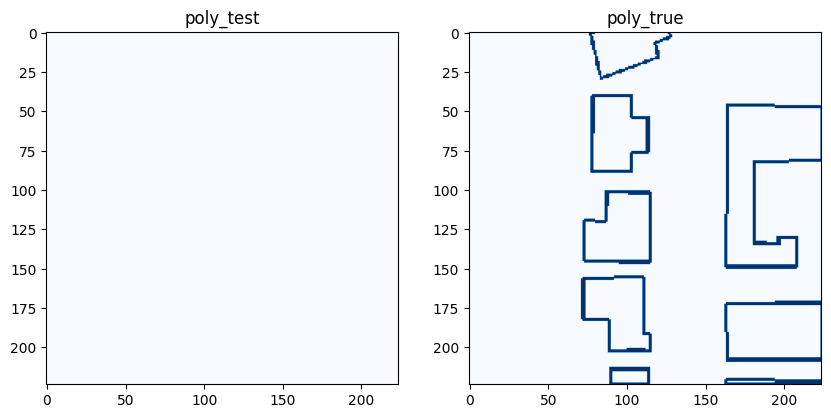

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(list_polygone_pred_polygone_voisinage_10_seuil_0_9[10], cmap='Blues')
axs[0].set_title('poly_test')
matrice_poly_inv = list_polygone_pred_polygone_voisinage_1_seuil_0_7[10]
axs[1].imshow(liste_polygone_true[10], cmap='Blues')
axs[1].set_title('poly_true')

plt.show()